# Курсовая работа. Блок 1
*Pandas и Matplotlib*

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. 

<br><br>
**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, предложено задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________
Обозначения:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;**(p)** – задание может быть выполнено после прохождения модулей по Pandas <br>
&nbsp;&nbsp;&nbsp;&nbsp;**(m)** – задание может быть выполнено после прохождения модуля по Matplotlib <br>
&nbsp;&nbsp;&nbsp;&nbsp;⭐ – необязательное задание повышенной сложности
_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

from datetime import date
from datetime import datetime, timedelta
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


##### Для начала загрузим все имеющиеся данные в датасеты:

Загрузим таблицу с курсами, по анализу данных видно, что столбец 'Unnamed: 0', скорее всего, является названием индекса

In [3]:
df_courses = pd.read_csv('courses.csv', index_col='Unnamed: 0')

Рассмотрим данные, которые вошли в таблицу "courses.csv"

In [4]:
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      15 non-null     object
 1   title   15 non-null     object
 2   field   15 non-null     object
dtypes: object(3)
memory usage: 480.0+ bytes


Это небольшая таблица из 15 строк и 3х колонок, рассмотрим её всю:

In [5]:
df_courses

id                                title  \
0   943306102e5b067d08a29094f37b8193              Java-разработчик c нуля   
1   17013cd19d25cb3f28dc1b2683721bb9                   Веб-дизайн Базовый   
2   ac634845fb0350d0e9d49078aaa4b68f                        Excel Базовый   
3   0770b1b039964228294f1f34b29fc2c1        Руководитель digital-проектов   
4   abce125a877c2196a3bc7bfbc11b5fc5       Веб-вёрстка для начинающих 2.0   
5   e9bb9205eeed307ee7cbaa08bfd166c3                    JavaScript с нуля   
6   04ba6d0b40670c43a209141fa01fa784                 Анимация интерфейсов   
7   c9fcb746d51e41bc5a217002d081454b                   Веб-дизайн PRO 2.0   
8   dad6f6ffc086caa89e2f40c28a9c7490                            UX-дизайн   
9   bf27a4bf4ada4c756451703ea62a914f        Интернет-маркетолог от Ingate   
10  e3a0df907589d56692b5cb561fd90d87                Веб-дизайн с нуля 2.0   
11  480d25ad36878fce09e7aada316ba1a6                      Веб-разработчик   
12  842218e7c983795934bbe4533c0888c8             SMM-маркетолог от А до Я   
13  ccbab00e99b27f83369d6cc89d914ad6  PHP-разработчик с 0 до PRO. Часть 1   
14  6e4837f0a65c68efbfdd0594d6774701                     Java-разработчик   

          field  
0   Development  
1        Design  
2      Business  
3      Business  
4   Development  
5   Development  
6        Design  
7        Design  
8        Design  
9     Marketing  
10       Design  
11  Development  
12    Marketing  
13  Development  
14  Development

Рассмотрим наиболее частые области из представленных курсов:

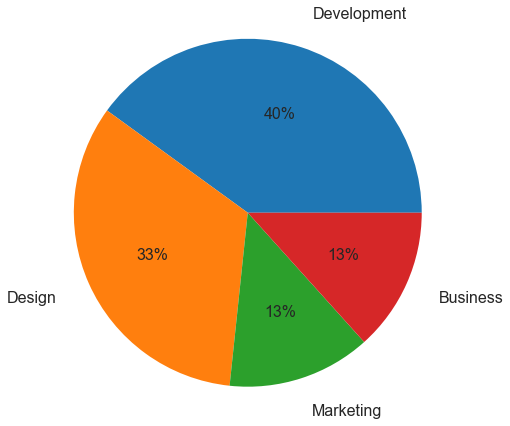

In [6]:
fields = df_courses['field'].value_counts()
plot = fields.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

In [7]:
list_courses_id = pd.unique(df_courses['id']).tolist()
list_courses_title = pd.unique(df_courses['title']).tolist()

courses_names = {}
for name, id_ in zip(list_courses_title, list_courses_id):
    courses_names[id_] = name

In [8]:
# общее количество курсов в датасете
print('Всего в представленных данных: ', df_courses['title'].count(), ' курсов')

Всего в представленных данных:  15  курсов


Рассмотрим следующую таблицу "course_contents"

Для начала загрузим данные. И выгрузим сводную информацию о таблице:

In [9]:
df_courses_content = pd.read_csv('course_contents.csv')
df_courses_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   course_id      1201 non-null   object
 1   module_number  1201 non-null   int64 
 2   module_title   1201 non-null   object
 3   lesson_number  1201 non-null   int64 
 4   lesson_title   1201 non-null   object
 5   lesson_token   1201 non-null   object
 6   is_video       1201 non-null   bool  
 7   is_homework    1201 non-null   bool  
dtypes: bool(2), int64(2), object(4)
memory usage: 58.8+ KB


In [10]:
df_master_courses = df_courses_content.merge(df_courses, left_on='course_id', right_on='id', how='outer')\
    .drop('id', axis='columns')\
    .rename(columns={'title':'course_title'})
# удалим дублирующую колонку ID курса
# переименуем колонку title для простоты понимания в будущем
df_master_courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   course_id      1201 non-null   object
 1   module_number  1201 non-null   int64 
 2   module_title   1201 non-null   object
 3   lesson_number  1201 non-null   int64 
 4   lesson_title   1201 non-null   object
 5   lesson_token   1201 non-null   object
 6   is_video       1201 non-null   bool  
 7   is_homework    1201 non-null   bool  
 8   course_title   1201 non-null   object
 9   field          1201 non-null   object
dtypes: bool(2), int64(2), object(6)
memory usage: 86.8+ KB


Рассмотрим следующую таблицу "df_progresses"

In [11]:
df_progresses = pd.read_csv('progresses.csv')
print(df_progresses.info())
df_progresses.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15934 entries, 0 to 15933
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          15934 non-null  object
 1   student_id  15934 non-null  object
 2   course_id   15934 non-null  object
dtypes: object(3)
memory usage: 373.6+ KB
None


id                        student_id  \
0  8459fbc07e32ec92bd7b43d7df9bfa89  a6ae278c0eab719b3784e5ea147c128f   
1  a9d173142534e33ce39146017f9c6835  e24062de06d301937b3b3a8e383e3e21   

                          course_id  
0  0770b1b039964228294f1f34b29fc2c1  
1  bf27a4bf4ada4c756451703ea62a914f

Рассмотрим таблицу "df_progress_phases"

In [12]:
df_progress_phases = pd.read_csv('progress_phases.csv', parse_dates=['start_date','finish_date'], dayfirst=False)
print(df_progress_phases.info())
df_progress_phases.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350677 entries, 0 to 350676
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   progress_id    350677 non-null  object             
 1   module_number  350677 non-null  int64              
 2   lesson_number  350677 non-null  int64              
 3   status         350677 non-null  object             
 4   start_date     350677 non-null  datetime64[ns, UTC]
 5   finish_date    334508 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(2), object(2)
memory usage: 16.1+ MB
None


progress_id  module_number  lesson_number status  \
0  a387ab916f402cb3fbfffd29f68fd0ce              2              4   done   
1  a387ab916f402cb3fbfffd29f68fd0ce              1              1   done   

                        start_date                      finish_date  
0 2018-06-23 08:28:50.681065+00:00 2018-06-23 08:28:52.439542+00:00  
1 2018-06-20 14:25:21.783762+00:00 2018-06-20 15:45:07.717209+00:00

Объединим таблицы " и " в одну и рассмотрим полученные данные:

In [13]:
df_master_progresses = df_progress_phases.merge(df_progresses, left_on='progress_id', right_on='id', how='outer')\
    .drop('id', axis='columns')\
    .rename(columns={'course_id':'course_id_progress'})
print(df_master_progresses.info())
df_master_progresses.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350682 entries, 0 to 350681
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   progress_id         350677 non-null  object             
 1   module_number       350677 non-null  float64            
 2   lesson_number       350677 non-null  float64            
 3   status              350677 non-null  object             
 4   start_date          350677 non-null  datetime64[ns, UTC]
 5   finish_date         334508 non-null  datetime64[ns, UTC]
 6   student_id          350682 non-null  object             
 7   course_id_progress  350682 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(2), object(4)
memory usage: 24.1+ MB
None


progress_id  module_number  lesson_number status  \
0  a387ab916f402cb3fbfffd29f68fd0ce            2.0            4.0   done   
1  a387ab916f402cb3fbfffd29f68fd0ce            1.0            1.0   done   

                        start_date                      finish_date  \
0 2018-06-23 08:28:50.681065+00:00 2018-06-23 08:28:52.439542+00:00   
1 2018-06-20 14:25:21.783762+00:00 2018-06-20 15:45:07.717209+00:00   

                         student_id                course_id_progress  
0  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b  
1  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b

In [14]:
df_master_progresses = df_progress_phases.merge(df_progresses, left_on='progress_id', right_on='id', how='inner')\
    .drop('id', axis='columns')\
    .rename(columns={'course_id':'course_id_in_progress'})

Минимальный год начала учёбы:  2016  ;  Минимальный год окончания учёбы:  2016
Максимальный год начала учёбы:  2019  ;  Максимальный год окончания учёбы:  2019
Усреднённый год начала учёбы:  2018  ;  Усреднённый год окончания учёбы:  2018

Диаграмма годов НАЧАЛА, диаграмма годов ОКОНЧАНИЯ обучения студентов и диаграмма статусов прохождения уроков


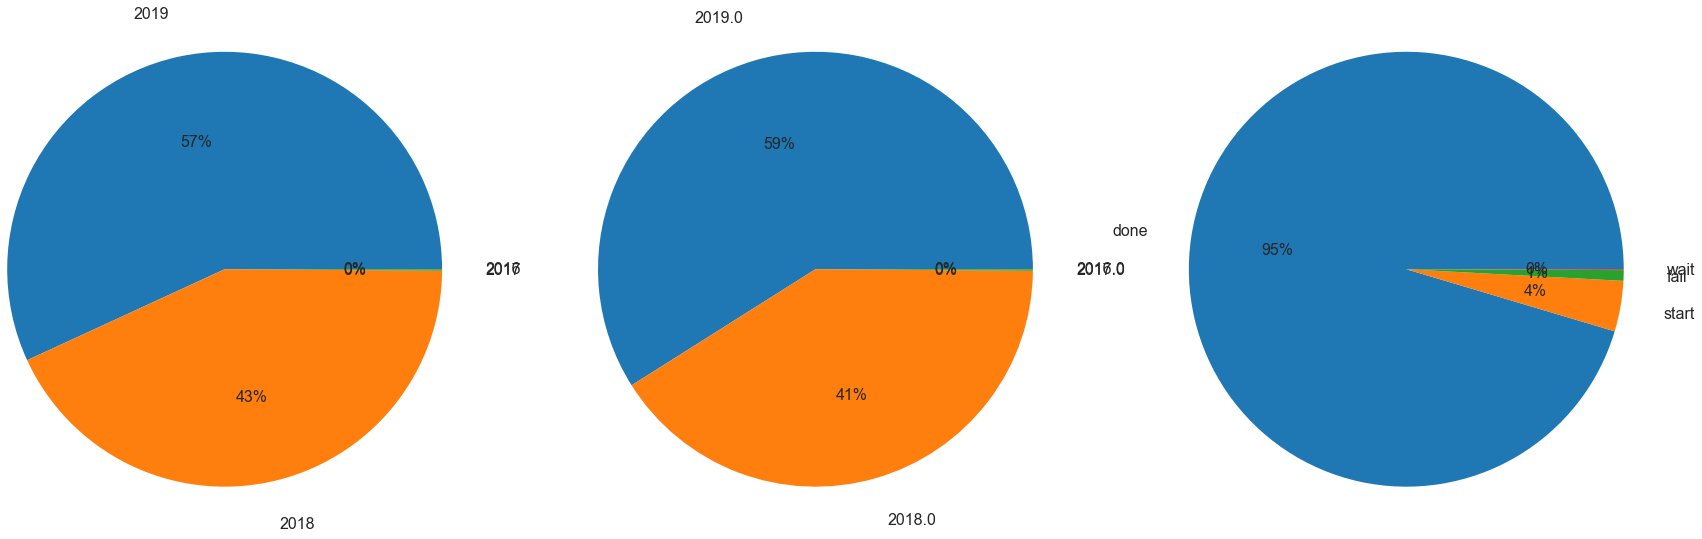

In [15]:
print('Минимальный год начала учёбы: ', int(df_master_progresses['start_date'].dt.year.min()), ' ; ',
     'Минимальный год окончания учёбы: ', int(df_master_progresses['finish_date'].dt.year.min()))
print('Максимальный год начала учёбы: ', int(df_master_progresses['start_date'].dt.year.max()), ' ; ',
     'Максимальный год окончания учёбы: ', int(df_master_progresses['finish_date'].dt.year.max()))
print('Усреднённый год начала учёбы: ', int(df_master_progresses['start_date'].dt.year.mean()), ' ; ',
     'Усреднённый год окончания учёбы: ', int(df_master_progresses['finish_date'].dt.year.mean()))
print()
print('Диаграмма годов НАЧАЛА, диаграмма годов ОКОНЧАНИЯ обучения студентов и диаграмма статусов прохождения уроков')

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(30,5))
plot = df_master_progresses['start_date'].dt.year\
            .value_counts()\
            .plot\
            .pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2, ax=axs[0])
plot = df_master_progresses['finish_date'].dt.year\
            .value_counts()\
            .plot\
            .pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2, ax=axs[1])
plot = df_master_progresses['status']\
            .value_counts()\
            .plot\
            .pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2, ax=axs[2])
plt.show()

In [16]:
print('В таблицах рассмотрено ', len(df_master_progresses['student_id'].unique().tolist()), 'студентов')

В таблицах рассмотрено  9794 студентов


Рассмотрим таблицу "df_students"

In [17]:
df_students = pd.read_csv('students.csv', na_values=['NaN', ''], parse_dates=['birthday'], dayfirst=False)
print(df_students.info())
df_students.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43830 entries, 0 to 43829
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id_       43830 non-null  int64 
 1   id        43830 non-null  object
 2   city      13162 non-null  object
 3   birthday  25499 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB
None


id_                                id    city    birthday
0  1325  35e8a1938b9a33d5e45c8f4451c4309a     NaN         NaN
1  7503  6c3e52be632fc50de9640147e4017dcd  Москва  1979-10-23

In [18]:
print('В таблице рассмотрено ', len(df_students['id'].unique().tolist()), 'студентов')

В таблице рассмотрено  43830 студентов


Объединим две основные таблицы "df_master_courses" и "df_master_progresses" в одну для комплексной работы в дальнейшем.

In [19]:
df_main = df_master_progresses.merge(df_master_courses,
                                     left_on=['course_id_in_progress', 'module_number', 'lesson_number'],
                                     right_on=['course_id', 'module_number', 'lesson_number'],
                                     how='inner')\
    .drop('course_id_in_progress', axis='columns')

In [20]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   progress_id    350677 non-null  object             
 1   module_number  350677 non-null  int64              
 2   lesson_number  350677 non-null  int64              
 3   status         350677 non-null  object             
 4   start_date     350677 non-null  datetime64[ns, UTC]
 5   finish_date    334508 non-null  datetime64[ns, UTC]
 6   student_id     350677 non-null  object             
 7   course_id      350677 non-null  object             
 8   module_title   350677 non-null  object             
 9   lesson_title   350677 non-null  object             
 10  lesson_token   350677 non-null  object             
 11  is_video       350677 non-null  bool               
 12  is_homework    350677 non-null  bool               
 13  course_title   350677 non-nul

Посчитаем количество модулей на каждом курсе:

In [21]:
df_master_courses[['course_title', 'module_title', 'lesson_title']].head(2)

course_title                                       module_title  \
0  Анимация интерфейсов  Введение в Motion Design. Тренды, разновидност...   
1  Анимация интерфейсов  Введение в Motion Design. Тренды, разновидност...   

                                        lesson_title  
0                                         Знакомство  
1  Введение в Motion Design. Тренды, разновидност...

In [22]:
# количество модулей на каждом курсе
df_modules_amount_in_courses = df_master_courses[['course_title', 'module_title']]\
                    .groupby('course_title')\
                    .agg('nunique')\
                    .sort_values(by='module_title', ascending=False)\
                    .rename(columns={'module_title':'modules_amount'})

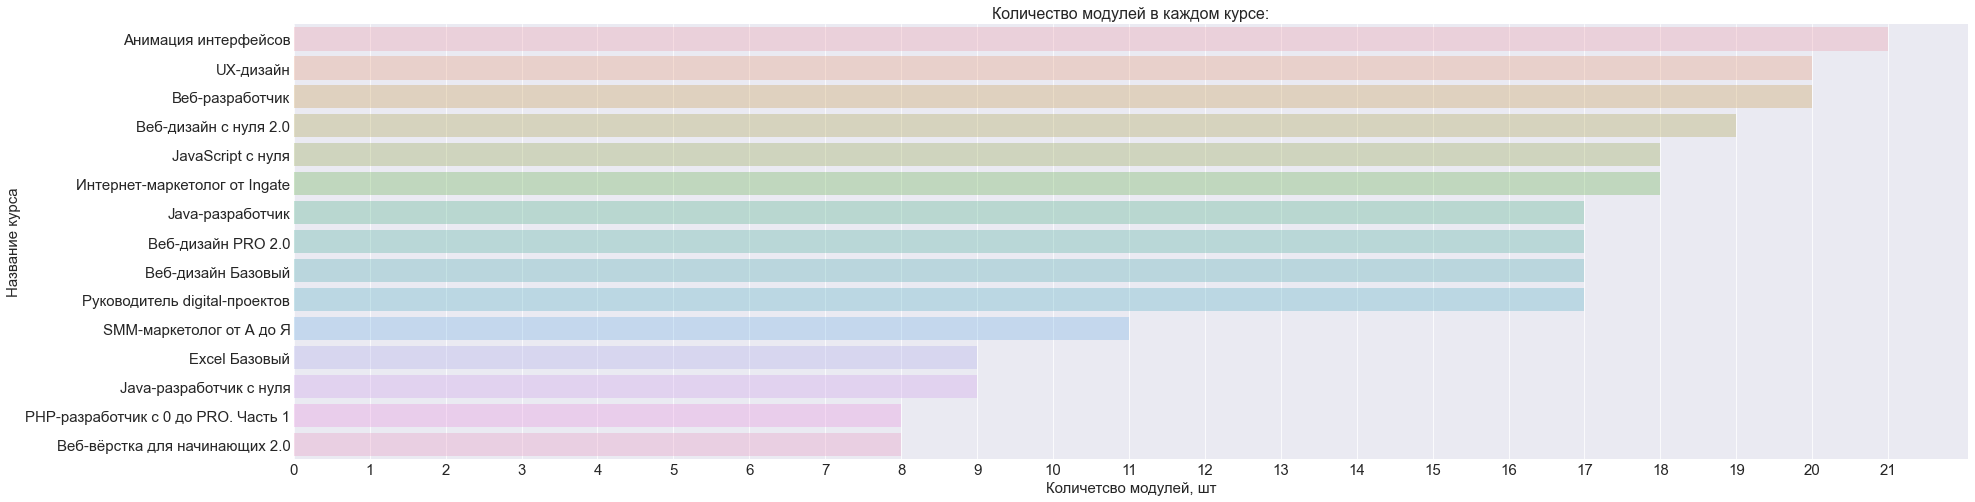

In [23]:
# Построим диаграмму количеств модулей для всех 15 курсов
fig, ax = plt.subplots(figsize=(30,8))
ax.set_title("Количество модулей в каждом курсе:", fontsize=16)
sns.barplot(y=df_modules_amount_in_courses.index, x=df_modules_amount_in_courses['modules_amount'], alpha=0.3)
ax.set_xlabel('Количетсво модулей, шт',size=15)
ax.set_ylabel('Название курса',size=15)
ax.set_xticks( list(range( 0, int(df_modules_amount_in_courses['modules_amount'].max())+1, 1)))
ax.tick_params(labelsize=15)
ax.tick_params(axis = 'x', rotation=0)
plt.show()

Определим количество уроков в каждом модуле каждого курса

In [24]:
# количество уроков в каждом модуле на каждом курсе
df_lessons_amount_in_courses_by_modules = df_master_courses[['course_title', 'module_title', 'lesson_title', 'module_number']]\
                    .groupby(['course_title', 'module_title', 'module_number'])\
                    .agg('nunique')\
                    .sort_values(by=['course_title', 'module_number'], ascending=True)\
                    .rename(columns={'lesson_title':'lesson_amount'})\
                    .reset_index()

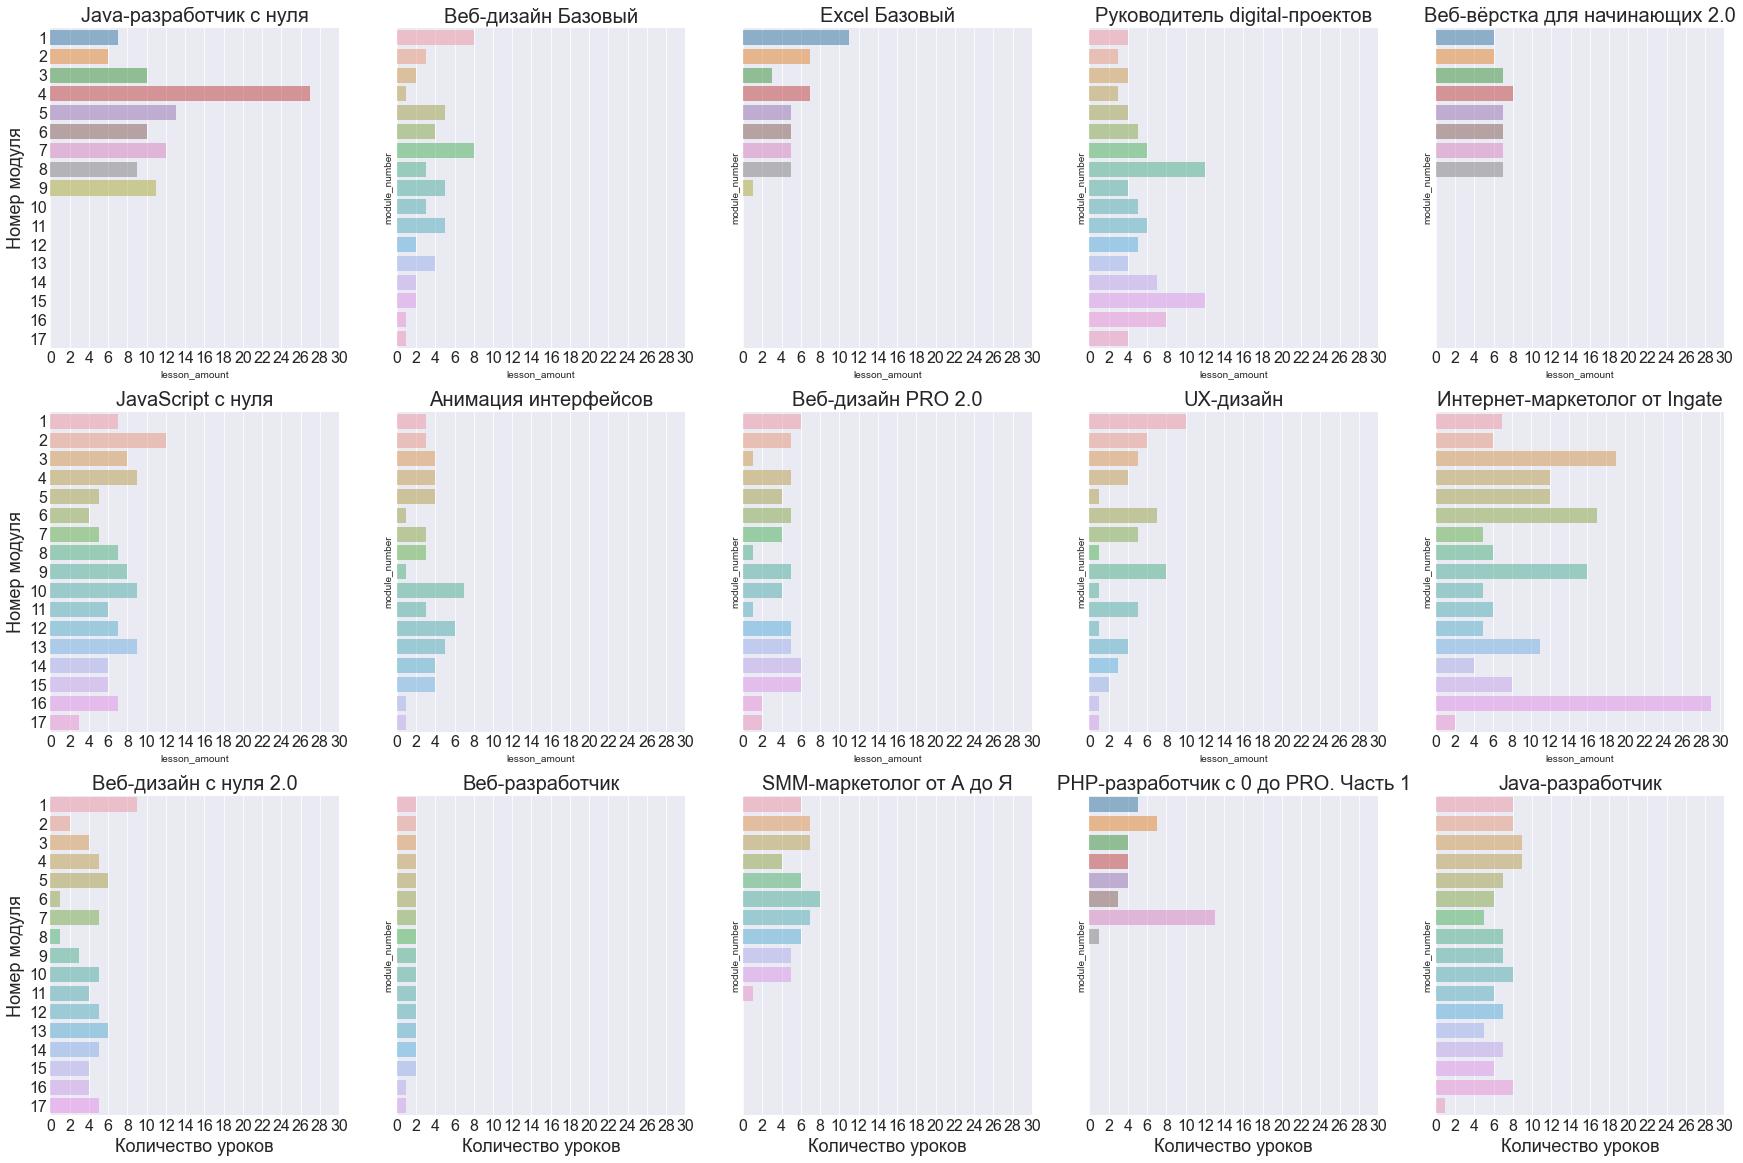

In [25]:
df_lessons_amount_in_courses_by_modules['module_number'] = df_lessons_amount_in_courses_by_modules['module_number'].astype(str)
f,axs=plt.subplots(3, 5, sharex=False, sharey=True, figsize=(30,20))
course_number = 0
for i_2_1 in range(3):
    for i_2_2 in range(5):
        ax = axs[i_2_1, i_2_2]
        course_name = df_courses['title'].tolist()[course_number]
        sns.barplot(y='module_number',
                    x='lesson_amount',
                    data=df_lessons_amount_in_courses_by_modules[['module_number','lesson_amount']]\
                        [df_lessons_amount_in_courses_by_modules['course_title'] == course_name],
                    alpha=0.5,
                    ax=axs[i_2_1, i_2_2])
        ax.set_title(course_name, fontsize=20)
        ax.tick_params(labelsize=16)
        ax.set_xticks( list(range( 0, int(df_lessons_amount_in_courses_by_modules['lesson_amount'].max())+2, 2)))
        if i_2_1 == 2:
            ax.set_xlabel('Количество уроков', fontsize=18)
        if i_2_2 == 0:
            ax.set_ylabel('Номер модуля', fontsize=18)
        course_number +=1
plt.show()
df_lessons_amount_in_courses_by_modules['module_number'] = df_lessons_amount_in_courses_by_modules['module_number'].astype(int)

Определим медианное количество уроков в модуле на каждом курсе

In [26]:
# медианное количество уроков в модуле на каждом курсе
df_lessons_amount_median_in_courses = df_lessons_amount_in_courses_by_modules[['course_title', 'lesson_amount']]\
        .groupby('course_title')\
        .median()\
        .rename(columns={'lesson_amount':'lessons_amount_median_in_modules'})\
        .sort_values(by='lessons_amount_median_in_modules', ascending=False)

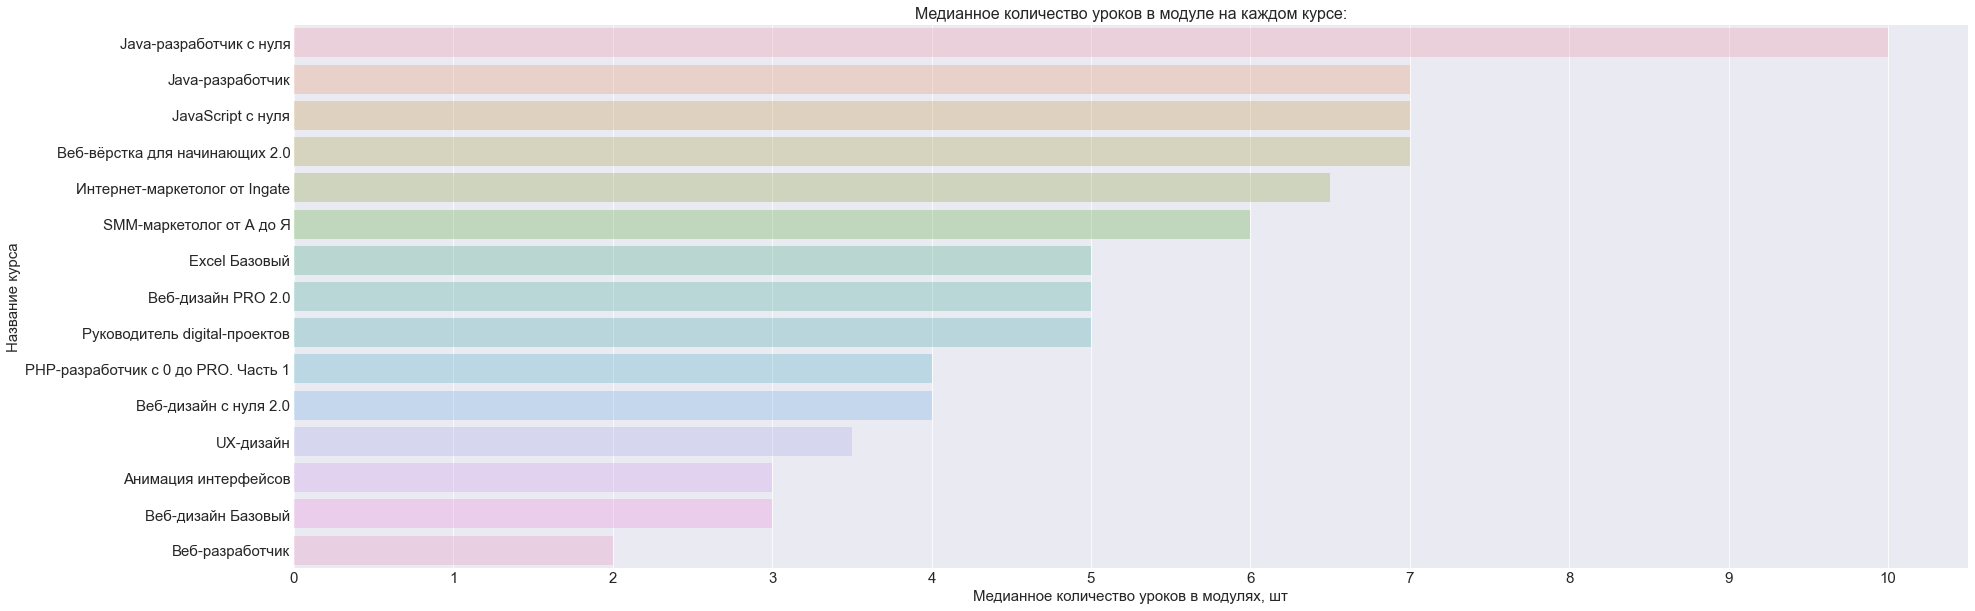

In [27]:
# Построим полченные данные в виде горизонтальной диаграммы.
fig, ax = plt.subplots(figsize=(30,10))
ax.set_title("Медианное количество уроков в модуле на каждом курсе:", fontsize=16)
sns.barplot(y=df_lessons_amount_median_in_courses.index,
            x=df_lessons_amount_median_in_courses['lessons_amount_median_in_modules'],
            alpha=0.3)
ax.set_xlabel('Медианное количество уроков в модулях, шт',size=15)
ax.set_ylabel('Название курса',size=15)
ax.set_xticks( list(range( 0, int(df_lessons_amount_median_in_courses['lessons_amount_median_in_modules'].max())+1, 1)))
ax.tick_params(labelsize=15)
ax.tick_params(axis = 'x', rotation=0)
plt.show()

Определим количество учеников на каждом курсе

In [28]:
df_students_on_courses = df_main[['student_id', 'course_title']]\
    .groupby('course_title')\
    .agg('nunique')\
    .rename(columns={'student_id':'students_amount_on_courses'})\
    .sort_values(by='students_amount_on_courses', ascending=False)    

(m) Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы

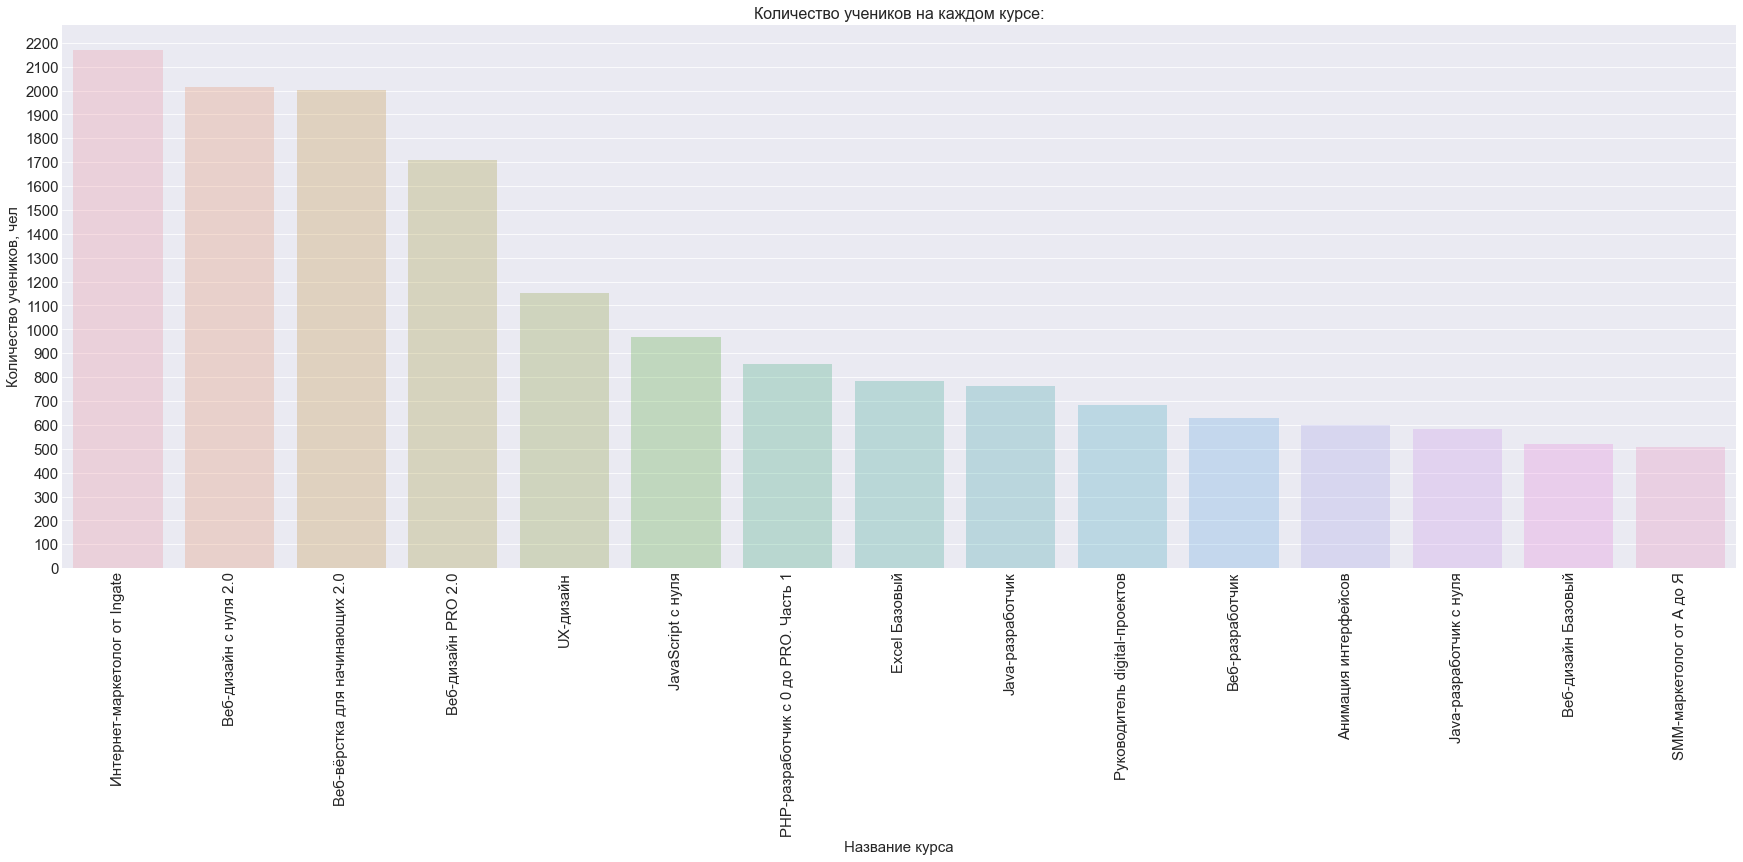

In [29]:
# Построем данные о количетсве студентов на курсах в виде ВЕРТИКАЛЬНОЙ диаграммы
fig, ax = plt.subplots(figsize=(30,10))

ax.set_title("Количество учеников на каждом курсе:", fontsize=16)
sns.barplot(x=df_students_on_courses.index,
            y=df_students_on_courses['students_amount_on_courses'],
            alpha=0.3,
            ax=ax)
ax.set_ylabel('Количество учеников, чел',size=15)
ax.set_xlabel('Название курса',size=15)
ax.set_yticks( list(
                    range(0, int(df_students_on_courses['students_amount_on_courses'].max())+100, 100)
                    )
             )
ax.tick_params(labelsize=15)
ax.tick_params(axis = 'x', rotation=90)

plt.show()

3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐

In [30]:
# Добавим в таблицу количества студентов на курсах информацию об области курса
df_students_on_courses_with_field = df_students_on_courses\
                                    .reset_index()\
                                    .merge(df_courses[['title', 'field']],
                                     left_on='course_title',
                                     right_on='title',
                                     how='inner')\
                                    .drop('title', axis='columns')

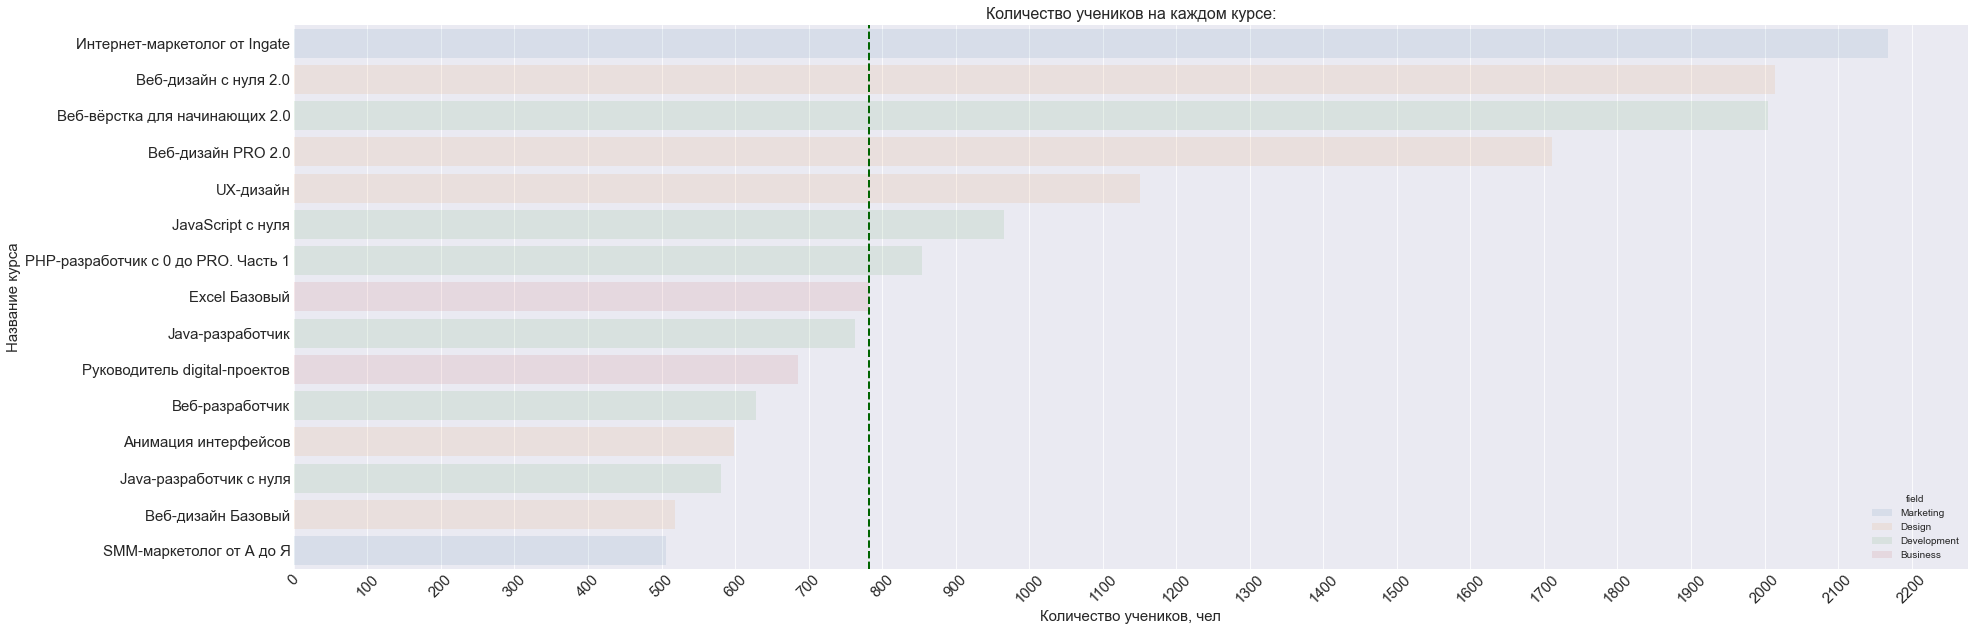

In [31]:
# Построем данные в виде горизонтальной диаграммы
fig, ax = plt.subplots(figsize=(30,10))

ax.set_title("Количество учеников на каждом курсе:", fontsize=16)
sns.barplot(data = df_students_on_courses_with_field,
            y=df_students_on_courses_with_field['course_title'],
            x=df_students_on_courses_with_field['students_amount_on_courses'],
            alpha=0.1,
            hue='field',
            dodge=False,
            ax=ax)
ax.set_xlabel('Количество учеников, чел',size=15)
ax.set_ylabel('Название курса',size=15)
ax.set_xticks( list(
                    range(0, int(df_students_on_courses_with_field['students_amount_on_courses'].max())+100, 100)
                    )
             )
ax.tick_params(labelsize=15)
ax.tick_params(axis = 'x', rotation=45)
ax.axvline(x = df_students_on_courses_with_field['students_amount_on_courses'].median(),
           color='darkgreen',
           linewidth=2,
           linestyle='--')
plt.show()

In [32]:
# сумма количества студенов на всех курсах:
df_students_on_courses['students_amount_on_courses'].sum()

15929

In [33]:
# Количество уникальных ID студентов в представленных данных:
len(df_main['student_id'].unique().tolist())

9794

Определим минимальный, максимальный, средний, медианный возраст студентов

In [34]:
# минимальный, максимальный, средний, медианный возраст студентов

# Для определния возвраста студентов необходимо сконвертировать столбец с данными о дате рождения студентов в формат дат
# Однако, это невозможно сделать, пока там есть пропущенные значения. Удалим их.
df_students_2 = df_students.dropna()

# Помотрим максимальные и минимальные значения, оставшиеся в данных дат рождения
print('Самая ранняя дата рождения', df_students_2['birthday'].min())
print('Самая поздняя дата рождения', df_students_2['birthday'].max())

Самая ранняя дата рождения 0001-05-28
Самая поздняя дата рождения 9187-04-19


In [35]:
# Полученые значения говорят о том, что в данных осталось заведомо неправльные данные
# Исключим их убрав заведомо неверные даты - ранее 1990 года и позднее 2022
df_students_2 = df_students_2[(df_students_2['birthday'] > '1900') & (df_students_2['birthday'] < '2022')]

In [36]:
# Теперь столбец дат рождения можно перевести в корректный формат:
df_students_2['birthday'] = pd.to_datetime(df_students_2['birthday'], format="%Y/%m/%d")
# А также добавить столбец с годом рождения:
df_students_2['birth_Year'] = df_students_2['birthday'].dt.year
# В итоге получим следующий формат данных:
df_students_2.head()

id_                                id             city   birthday  \
1    7503  6c3e52be632fc50de9640147e4017dcd           Москва 1979-10-23   
7   11070  35a36d90b745992b59085c8d54a072e7       Красноярск 1991-08-15   
8   11756  37e8e8179295ae764524223086b0b568           Москва 1987-08-24   
11  13568  fb10649db552c5f451bea45ed754d428  Санкт-Петербург 1988-07-16   
15  15112  d15a188c90bb4d83957ac14de78fada4  Санкт-Петербург 1991-01-16   

    birth_Year  
1         1979  
7         1991  
8         1987  
11        1988  
15        1991

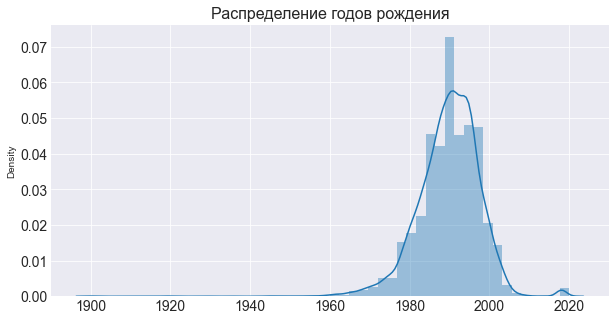

In [37]:
# Давайте посмотрим на график распределения годов рождения.
plt.figure(figsize=(10,5))
plt.title("Распределение годов рождения", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df_students_2['birth_Year'], axlabel=False)
plt.show()

Налицо наличие ряда предельных значений (выбросов). Они искажают распределение, и график не очень-то информативен в этой форме: нам нужно **усечь данные**, исключив выбросы из рассмотрения.

Предлагается использовать основное, но очень мощное правило: правило трёх сигм — **68–95–99.7**. Это правило гласит, что для нормального распределения:
* 68.27% значений $ \in [\mu - \sigma , \mu + \sigma]$
* 95.45% значений $ \in [\mu - 2\sigma , \mu + 2\sigma]$
* 99.7% значений $ \in [\mu - 3\sigma , \mu + 3\sigma]$  
где $\mu$ и $\sigma$ — среднее значение и стандартное отклонение нормального распределения.

Здесь верно, что распределение не обязательно нормальное, но для формы, подобной той, которая у нас есть, мы увидим, что применение третьего фильтра **значительно улучшит наши результаты**.

<img src="https://www.researchgate.net/profile/Bin_Wang111/publication/273955667/figure/fig3/AS:339883190177813@1458045875582/The-confidence-intervals-correspond-to-3-sigma-rule-of-the-normal-distribution.png" width="850" height="442" />



In [38]:
# Наблюдаемое отклонение от среднего
dev = (df_students_2['birth_Year']-df_students_2['birth_Year'].mean()).abs()
# Стандартное отклонение
std = df_students_2['birth_Year'].std()
# Фильтруем исходный набор данных
df_students_2 = df_students_2[~(dev>3*std)]

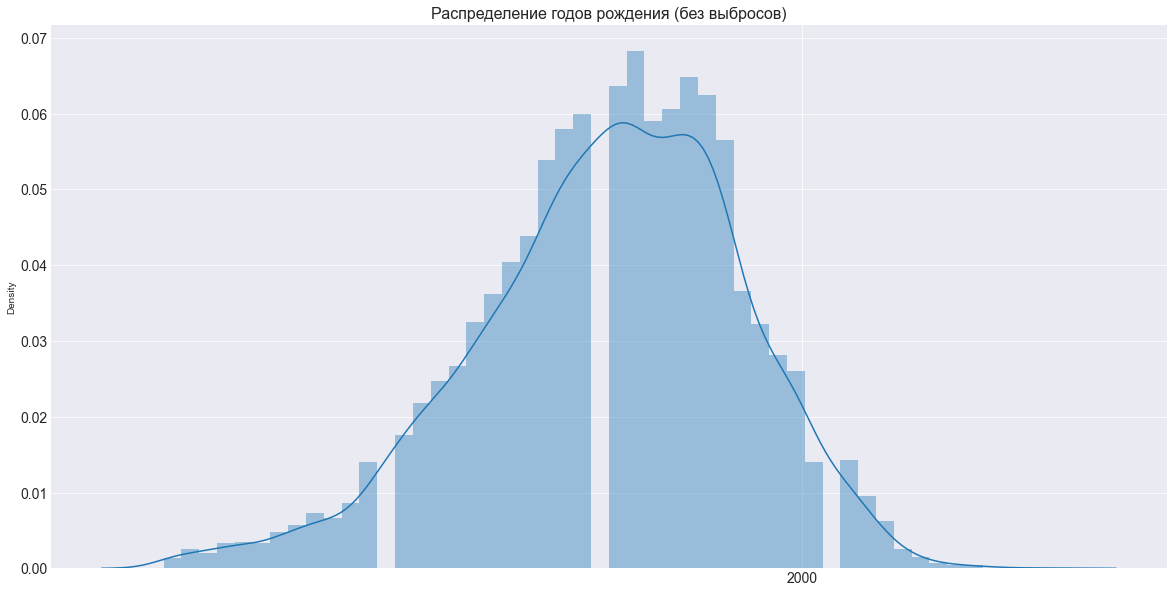

In [39]:
# Рассмотрим график распределения для усечённых данных:
plt.figure(figsize=(20,10))
plt.title("Распределение годов рождения (без выбросов)", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_students_2['birth_Year']+1), 200))

sns.distplot(df_students_2['birth_Year'], axlabel=False)
plt.show()

Так заметно лучше.

In [40]:
# Посмотрим сводку по полученным данным:
df_students_2['birth_Year'].describe()

count    11201.000000
mean      1989.958664
std          6.885634
min       1967.000000
25%       1986.000000
50%       1991.000000
75%       1995.000000
max       2013.000000
Name: birth_Year, dtype: float64

### ВАЖНО для определния возраста студентов:

In [41]:
# Выберем нужные колонки из таблицы "df_main"
# сгрупирем их по ID студента и ID курса
# сагреггируем по минимальной дате начала обучения
students_start_date = df_main[['start_date', 'student_id', 'course_id']]\
                        .groupby(['student_id','course_id'])['start_date']\
                        .min()\
                        .reset_index()
# создадим столбец с годом начала обучения
students_start_date['year_start'] = students_start_date['start_date'].dt.year
# удалим лишний столбец
students_start_date = students_start_date.drop('start_date', axis='columns')
# выведем сводку по новому датасету
print(students_start_date.info())
students_start_date.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15929 entries, 0 to 15928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  15929 non-null  object
 1   course_id   15929 non-null  object
 2   year_start  15929 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 373.5+ KB
None


student_id                         course_id  \
0  000333b6aa5706c53f4d2ec24c7a128d  842218e7c983795934bbe4533c0888c8   
1  0007e271c3f2f20ff8675df9d81e0401  c9fcb746d51e41bc5a217002d081454b   
2  0007e271c3f2f20ff8675df9d81e0401  e3a0df907589d56692b5cb561fd90d87   

   year_start  
0        2019  
1        2019  
2        2019

In [42]:
# объединим данные по году начала обучения и усеченную таблицу с годом рождения студентов.
# Данные возьмем только тем ID студентов, которые есть в обеих таблицах
df_students_3 = df_students_2.merge(students_start_date, left_on='id', right_on='student_id', how='inner')\
                    .drop(['id', ], axis='columns')
# создадим столбец "age" равный разнице даты рождения и даты начала обучения
df_students_3['age'] = df_students_3['year_start'] - df_students_3['birth_Year']
# выведем сводку по столбцу "age"
df_students_3['age'].describe()

count    10557.000000
mean        28.218054
std          6.533196
min          5.000000
25%         23.000000
50%         28.000000
75%         32.000000
max         52.000000
Name: age, dtype: float64

In [43]:
# выведем данные по минимальному, максимальному, среднему и медианному возрасту студентов
print('Средний возраст студентов: ', round(df_students_3['age'].mean()), 'года(лет)')
print('Максимальный возраст студентов: ', round(df_students_3['age'].max()), 'года(лет)')
print('Минимальный возраст студентов: ', round(df_students_3['age'].min()), 'года(лет)')
print('Медианный возраст студентов: ', round(df_students_3['age'].median()), 'года(лет)')

Средний возраст студентов:  28 года(лет)
Максимальный возраст студентов:  52 года(лет)
Минимальный возраст студентов:  5 года(лет)
Медианный возраст студентов:  28 года(лет)


Определим минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [44]:
# минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
df_students_4=\
    df_students_3[['course_id', 'age']]\
                .groupby('course_id')\
                .agg(mean_age=('age','mean'), max_age=('age','max'), min_age=('age','min'), median_age=('age','median'))\
                .rename(courses_names, axis='index')\
                .round(0)\
                .astype(int)
df_students_4

mean_age  max_age  min_age  median_age
course_id                                                                  
Анимация интерфейсов                       28       49       13          28
Руководитель digital-проектов              31       47       19          30
Веб-дизайн Базовый                         27       49       14          26
Веб-разработчик                            27       49       12          26
Java-разработчик                           28       51       13          27
SMM-маркетолог от А до Я                   29       50       16          28
Java-разработчик c нуля                    28       52       14          28
Веб-вёрстка для начинающих 2.0             27       51       12          26
Excel Базовый                              33       50        5          33
Интернет-маркетолог от Ingate              30       51       15          29
Веб-дизайн PRO 2.0                         27       51       13          26
PHP-разработчик с 0 до PRO. Часть 1        28       51       13          27
UX-дизайн                                  29       49       13          28
Веб-дизайн с нуля 2.0                      27       51       13          26
JavaScript с нуля                          27       50       13          27

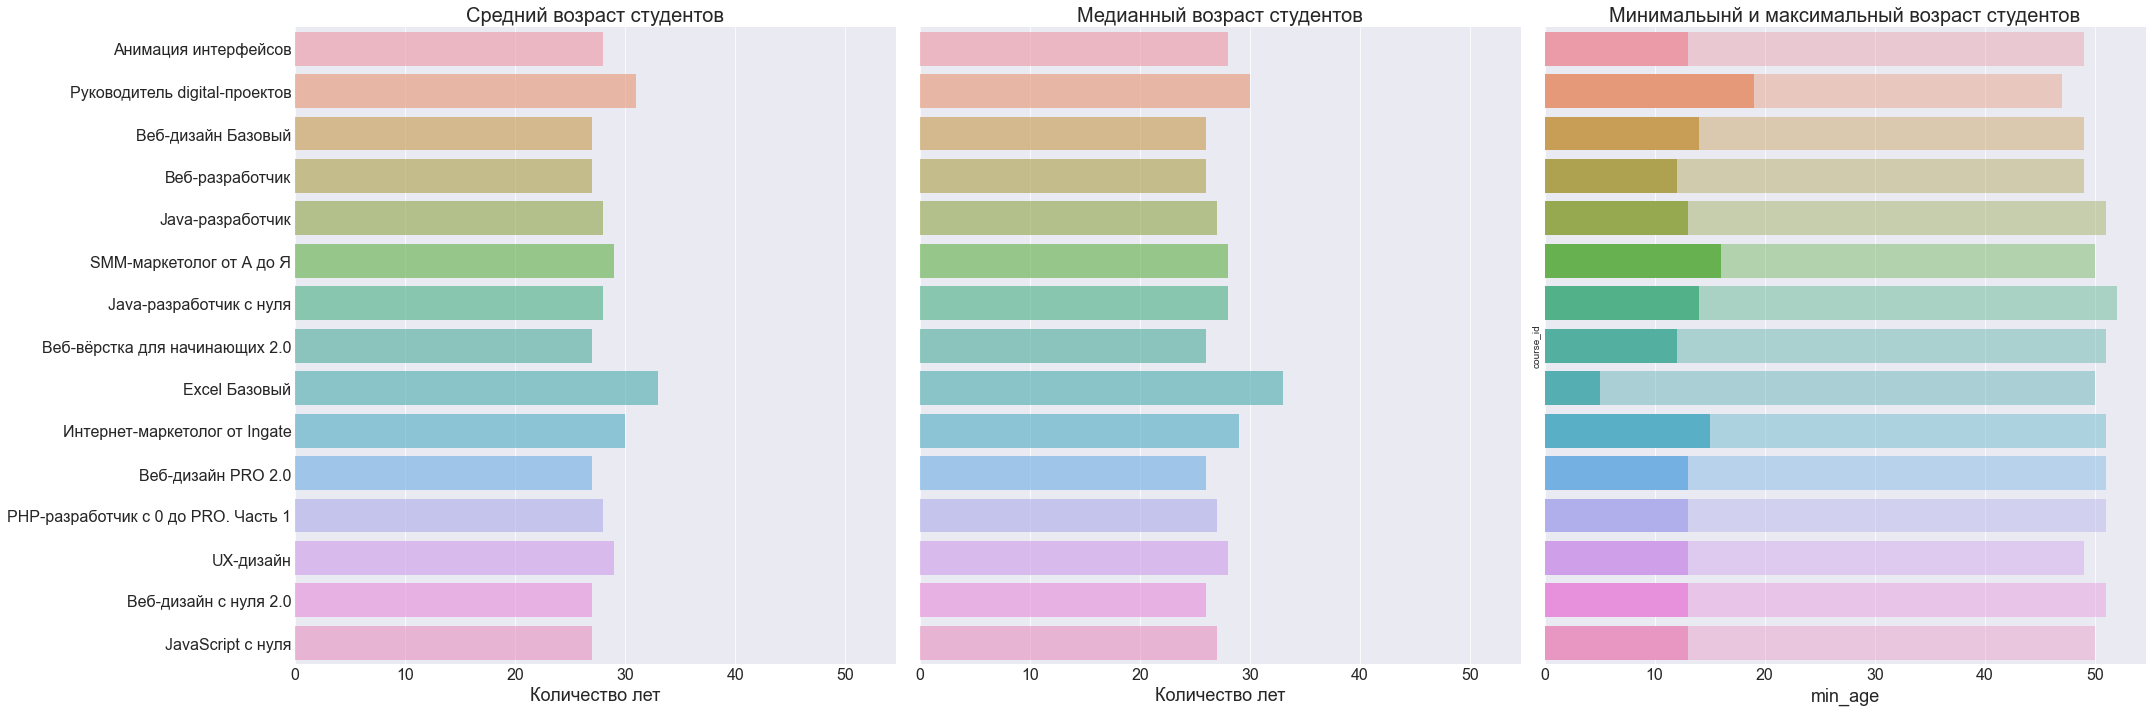

In [45]:
f,ax=plt.subplots(1, 3, sharey=True, sharex=True, figsize=(30,10))

sns.barplot(y=df_students_4.index, x='mean_age', data=df_students_4, alpha=0.6, ax=ax[0])
ax[0].set_title("Средний возраст студентов", fontsize=20)
ax[0].set_xlabel('Количество лет', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=df_students_4.index, x='median_age', data=df_students_4, alpha=0.6, ax=ax[1])
ax[1].set_title("Медианный возраст студентов", fontsize=20)
ax[1].set_xlabel('Количество лет', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y=df_students_4.index, x='max_age', data=df_students_4, alpha=0.4, ax=ax[2])
ax[2].set_title("Минимальынй и максимальный возраст студентов", fontsize=20)
ax[2].set_xlabel('Количество лет', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)
sns.barplot(y=df_students_4.index, x='min_age', data=df_students_4, alpha=0.9, ax=ax[2])

plt.tight_layout()
plt.show()

## Заключение по первому разделу:

В результате проведённого анализа исходных данных, мы получили следующую информацию:

1 общее количество курсов в датасете

In [46]:
print('Всего в представленных данных: ', df_courses['title'].count(), ' курсов')

Всего в представленных данных:  15  курсов


2 количество модулей на каждом курсе

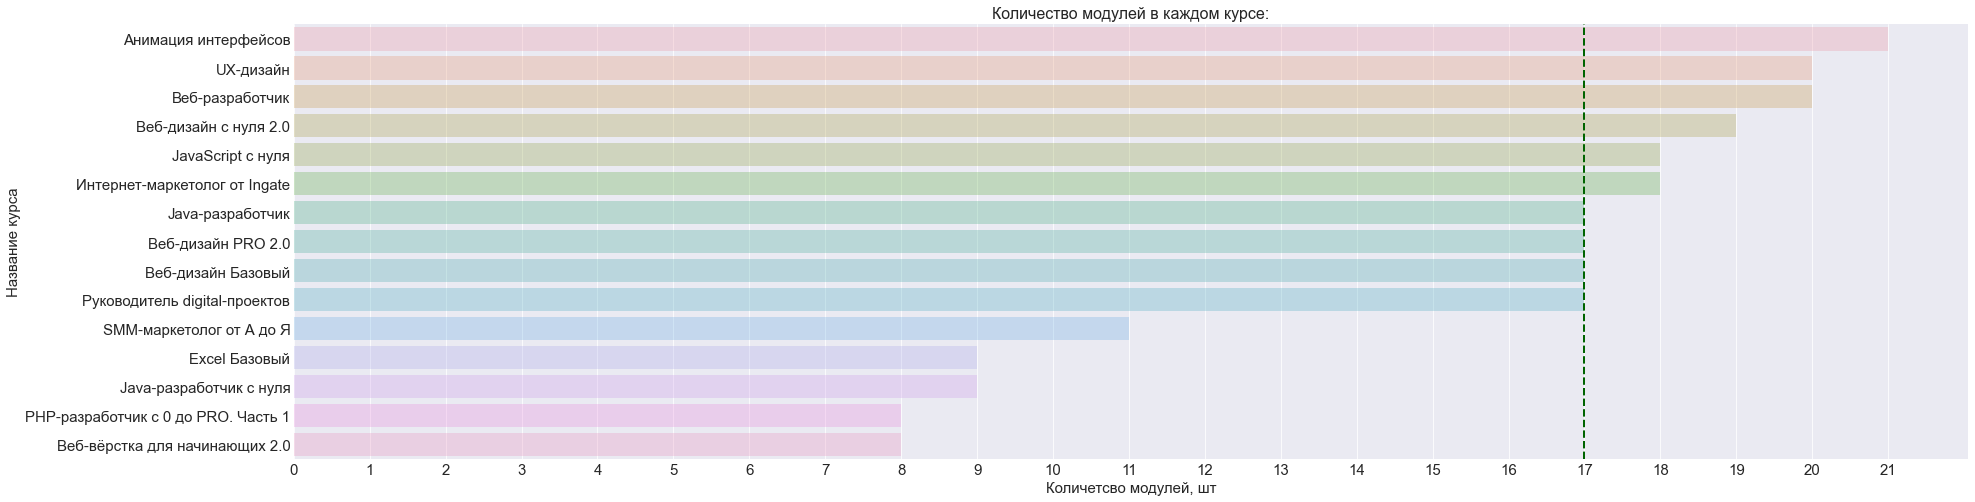

In [47]:
fig, ax = plt.subplots(figsize=(30,8))
ax.set_title("Количество модулей в каждом курсе:", fontsize=16)
sns.barplot(y=df_modules_amount_in_courses.index, x=df_modules_amount_in_courses['modules_amount'], alpha=0.3)
ax.set_xlabel('Количетсво модулей, шт',size=15)
ax.set_ylabel('Название курса',size=15)
ax.set_xticks( list(range( 0, int(df_modules_amount_in_courses['modules_amount'].max())+1, 1)))
ax.tick_params(labelsize=15)
ax.tick_params(axis = 'x', rotation=0)
ax.axvline(x = df_modules_amount_in_courses['modules_amount'].median(),
           color='darkgreen', linewidth=2, linestyle='--')
plt.show()

3 количество уроков в каждом модуле на каждом курсе

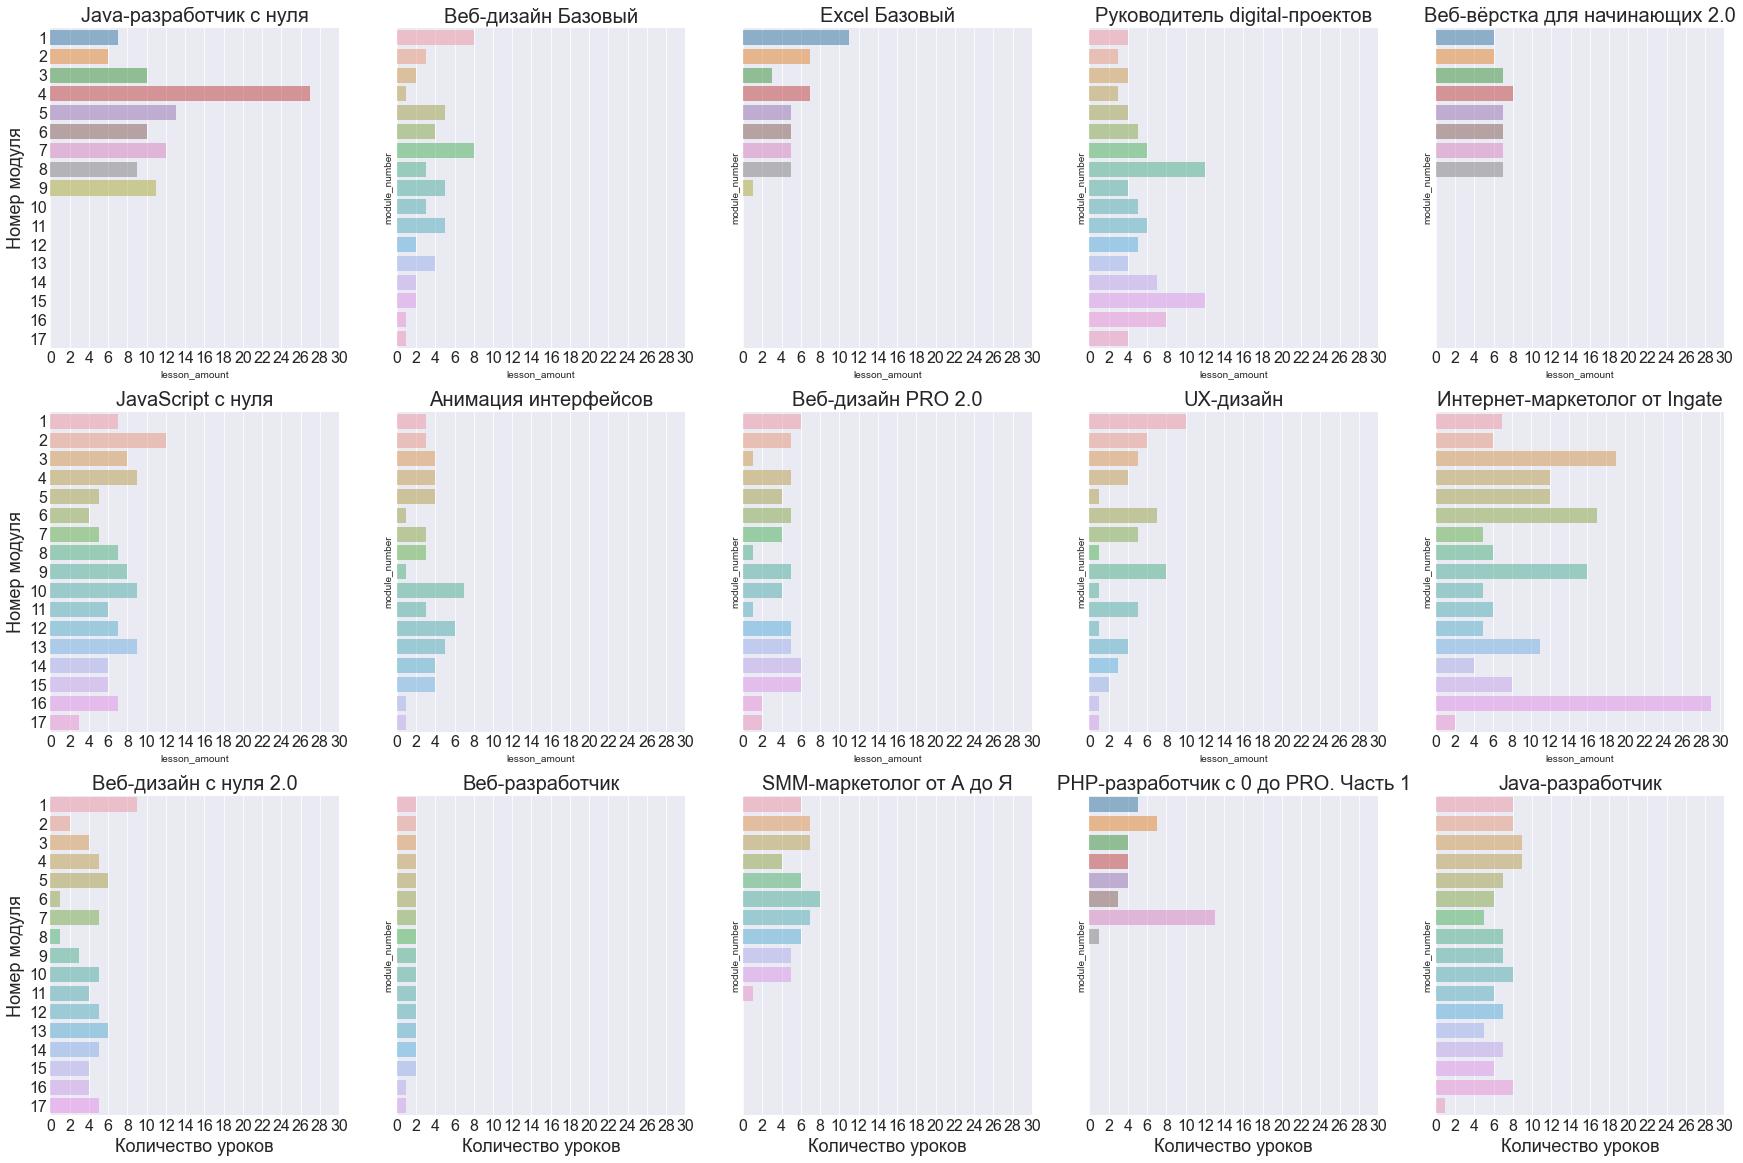

In [48]:
df_lessons_amount_in_courses_by_modules['module_number'] = df_lessons_amount_in_courses_by_modules['module_number'].astype(str)
f,axs=plt.subplots(3, 5, sharex=False, sharey=True, figsize=(30,20))
course_number = 0
for i_2_1 in range(3):
    for i_2_2 in range(5):
        ax = axs[i_2_1, i_2_2]
        course_name = df_courses['title'].tolist()[course_number]
        sns.barplot(y='module_number',
                    x='lesson_amount',
                    data=df_lessons_amount_in_courses_by_modules[['module_number','lesson_amount']]\
                        [df_lessons_amount_in_courses_by_modules['course_title'] == course_name],
                    alpha=0.5,
                    ax=axs[i_2_1, i_2_2])
        ax.set_title(course_name, fontsize=20)
        ax.tick_params(labelsize=16)
        ax.set_xticks( list(range( 0, int(df_lessons_amount_in_courses_by_modules['lesson_amount'].max())+2, 2)))
        if i_2_1 == 2:
            ax.set_xlabel('Количество уроков', fontsize=18)
        if i_2_2 == 0:
            ax.set_ylabel('Номер модуля', fontsize=18)
        course_number +=1
plt.show()
df_lessons_amount_in_courses_by_modules['module_number'] = df_lessons_amount_in_courses_by_modules['module_number'].astype(int)

4 медианное количество уроков в модуле на каждом курсе

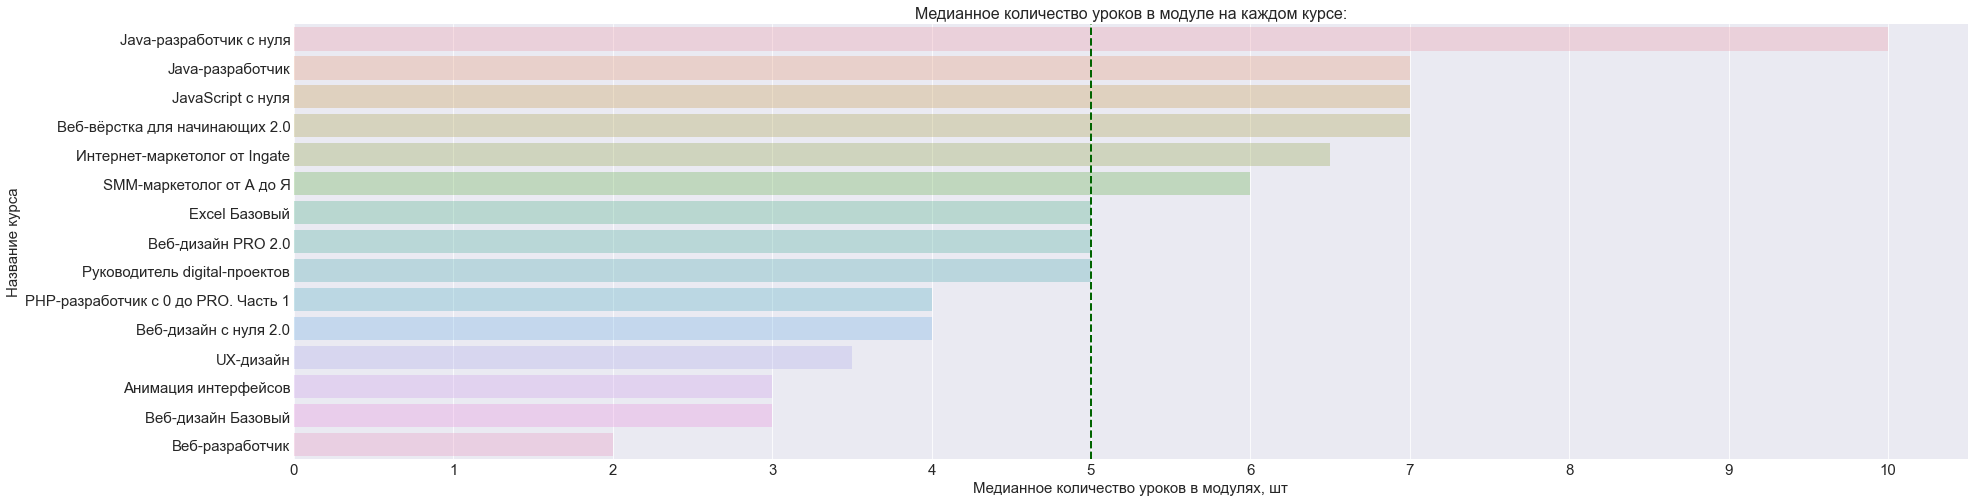

In [49]:
fig, ax = plt.subplots(figsize=(30,8))
ax.set_title("Медианное количество уроков в модуле на каждом курсе:", fontsize=16)
sns.barplot(y=df_lessons_amount_median_in_courses.index,
            x=df_lessons_amount_median_in_courses['lessons_amount_median_in_modules'],
            alpha=0.3)
ax.set_xlabel('Медианное количество уроков в модулях, шт',size=15)
ax.set_ylabel('Название курса',size=15)
ax.set_xticks( list(range( 0, int(df_lessons_amount_median_in_courses['lessons_amount_median_in_modules'].max())+1, 1)))
ax.tick_params(labelsize=15)
ax.tick_params(axis = 'x', rotation=0)
ax.axvline(x = df_lessons_amount_median_in_courses['lessons_amount_median_in_modules'].median(),
           color='darkgreen', linewidth=2, linestyle='--')
plt.show()

5 Количество учеников на каждом курсе

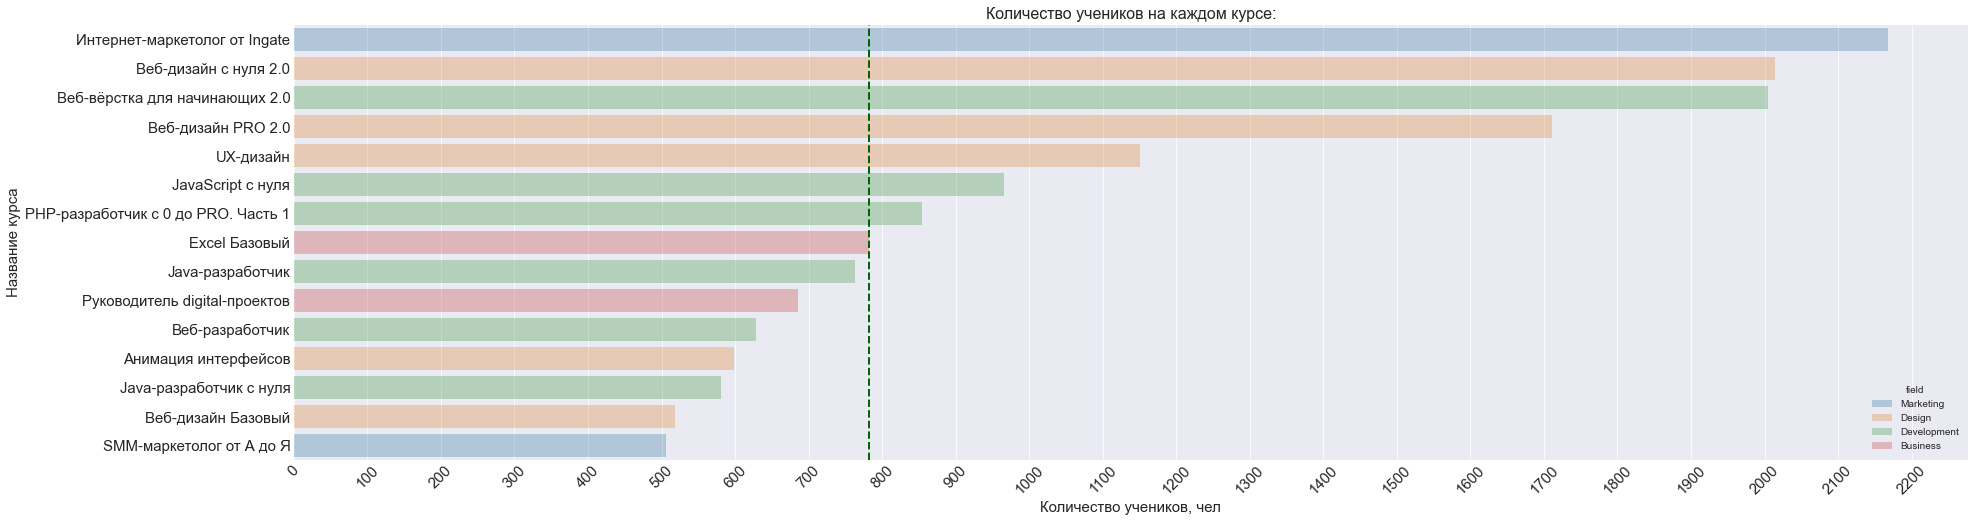

In [50]:
fig, ax = plt.subplots(figsize=(30,8))
ax.set_title("Количество учеников на каждом курсе:", fontsize=16)
sns.barplot(data = df_students_on_courses_with_field,
            y=df_students_on_courses_with_field['course_title'],
            x=df_students_on_courses_with_field['students_amount_on_courses'],
            alpha=0.3,
            hue='field',
            dodge=False,
            ax=ax)
ax.set_xlabel('Количество учеников, чел',size=15)
ax.set_ylabel('Название курса',size=15)
ax.set_xticks( list(range(0, int(df_students_on_courses_with_field['students_amount_on_courses'].max())+100, 100)))
ax.tick_params(labelsize=15)
ax.tick_params(axis = 'x', rotation=45)
ax.axvline(x = df_students_on_courses_with_field['students_amount_on_courses'].median(),
           color='darkgreen',
           linewidth=2,
           linestyle='--')
plt.show()

6 Минимальный, максимальный, средний, медианный возраст студентов

In [51]:
print('Средний возраст студентов: ', round(df_students_3['age'].mean()), 'лет')
print('Максимальный возраст студентов: ', round(df_students_3['age'].max()), 'года')
print('Минимальный возраст студентов: ', round(df_students_3['age'].min()), 'лет')
print('Медианный возраст студентов: ', round(df_students_3['age'].median()), 'лет')

Средний возраст студентов:  28 лет
Максимальный возраст студентов:  52 года
Минимальный возраст студентов:  5 лет
Медианный возраст студентов:  28 лет


7 Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

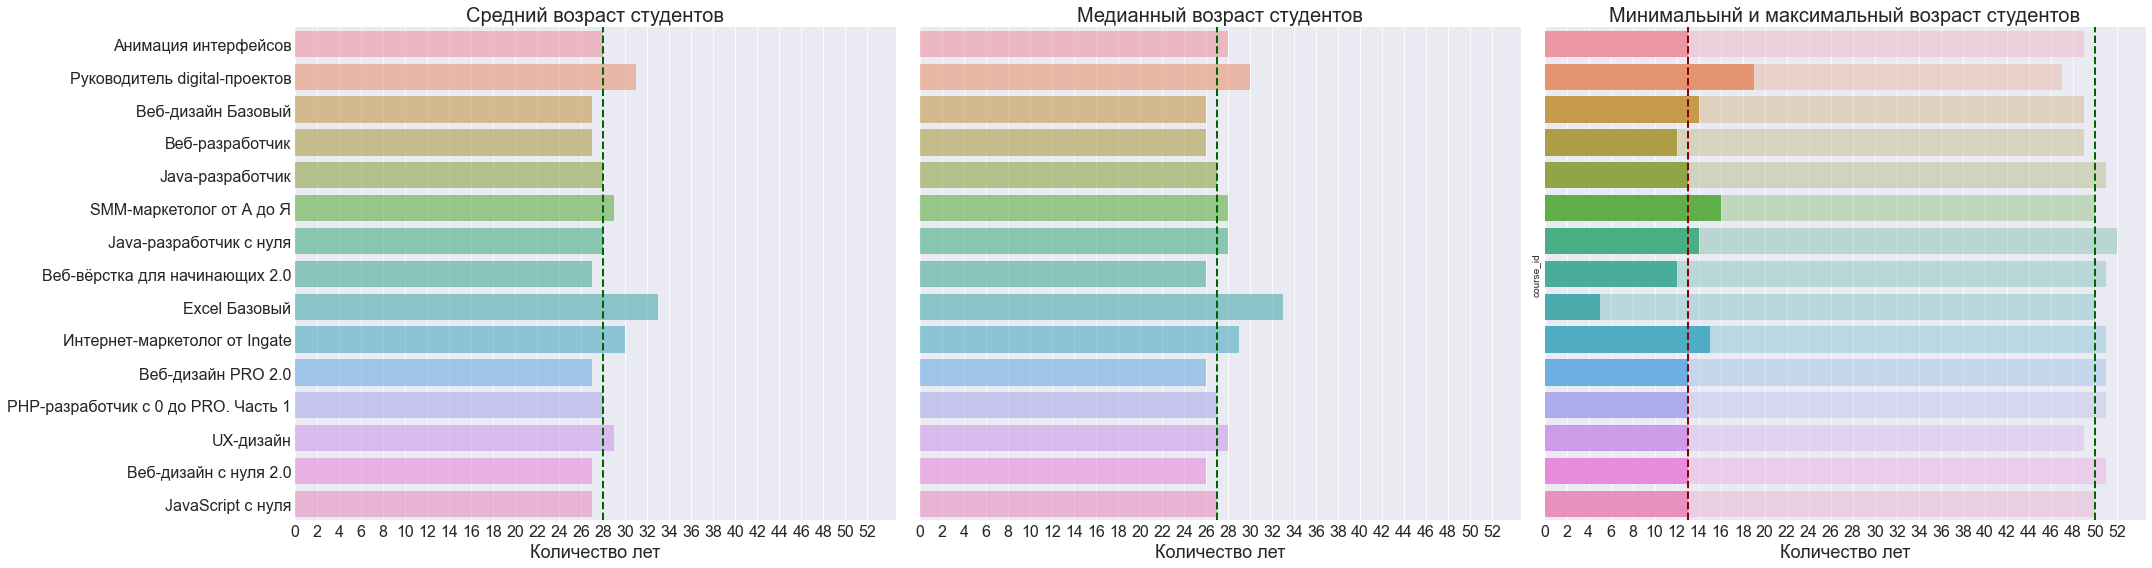

In [52]:
f,ax=plt.subplots(1, 3, sharey=True, sharex=True, figsize=(30,8))
sns.barplot(y=df_students_4.index, x='mean_age', data=df_students_4, alpha=0.6, ax=ax[0])
ax[0].set_title("Средний возраст студентов", fontsize=20)
ax[0].set_xlabel('Количество лет', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)
ax[0].axvline(x = df_students_4['mean_age'].median(), color='darkgreen', linewidth=2, linestyle='--')
sns.barplot(y=df_students_4.index, x='median_age', data=df_students_4, alpha=0.6, ax=ax[1])
ax[1].set_title("Медианный возраст студентов", fontsize=20)
ax[1].set_xlabel('Количество лет', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)
ax[1].axvline(x = df_students_4['median_age'].median(), color='darkgreen', linewidth=2, linestyle='--')
sns.barplot(y=df_students_4.index, x='max_age', data=df_students_4, alpha=0.3, ax=ax[2])
ax[2].set_title("Минимальынй и максимальный возраст студентов", fontsize=20)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)
ax[2].axvline(x = df_students_4['max_age'].median(), color='darkgreen', linewidth=2, linestyle='--')
sns.barplot(y=df_students_4.index, x='min_age', data=df_students_4, alpha=1, ax=ax[2])
ax[2].set_xlabel('Количество лет', fontsize=18)
ax[2].axvline(x = df_students_4['min_age'].median(), color='darkred', linewidth=2, linestyle='--')
ax[2].set_xticks(list(range(0, 54, 2)))

plt.tight_layout()
plt.show()

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

1. (p) Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.


Для начала определим, под каким названием в данных встерчается "Домашняя работа" и какое из них встречается первым?

In [53]:
def f_HT_detection(x):
    x = str(x)
    if 'Домашняя' in x:
        pass    
    else:
        x = 'not_HT'
    return x

df_main_ht_list = df_main[['course_title', 'module_number', 'lesson_number', 'lesson_title']]\
        .sort_values(by=['course_title','module_number','lesson_number'], ascending=True)

for i_ht in range(15):
    print(list(df_main_ht_list[['course_title', 'lesson_title']]\
        .groupby('course_title'))[i_ht][1]['lesson_title']\
        .apply(f_HT_detection)\
        .unique()\
        .tolist())

['not_HT', 'Домашняя работа']
['not_HT', 'Домашняя работа']
['not_HT', 'Домашняя работа', 'Домашняя работа 4.1', 'Домашняя работа 4.2', 'Домашняя работа 4.3', 'Домашняя работа 4.4', 'Домашняя работа 4.5', 'Домашняя работа 4.6', 'Домашняя работа 5.1', 'Домашняя работа 5.2', 'Домашняя работа 5.3', 'Домашняя работа 5.4', 'Домашняя работа 5.5']
['not_HT', 'Домашняя работа']
['not_HT', 'Домашняя работа']
['not_HT', 'Домашняя работа']
['not_HT', 'Домашняя работа', 'Домашняя работа (первая часть)', 'Домашняя работа (вторая часть)']
['not_HT', 'Домашняя работа']
['not_HT', 'Домашняя работа']
['not_HT', 'Домашняя работа']
['not_HT', 'Домашняя работа']
['not_HT', 'Домашняя работа']
['not_HT', 'Домашняя работа']
['not_HT', 'Домашняя работа']
['not_HT', 'Домашняя работа']


In [54]:
df_main[(df_main['lesson_title'] == 'Домашняя работа')][['course_title','module_number']].groupby('course_title').min()

module_number
course_title                                      
Excel Базовый                                    1
Java-разработчик                                 1
Java-разработчик c нуля                          1
JavaScript с нуля                                1
PHP-разработчик с 0 до PRO. Часть 1              1
SMM-маркетолог от А до Я                         1
UX-дизайн                                        1
Анимация интерфейсов                             1
Веб-вёрстка для начинающих 2.0                   1
Веб-дизайн PRO 2.0                               1
Веб-дизайн Базовый                               3
Веб-дизайн с нуля 2.0                            1
Веб-разработчик                                  1
Интернет-маркетолог от Ingate                    1
Руководитель digital-проектов                    1

In [55]:
df_main_2 = df_main[['course_title', 'start_date', 'lesson_title', 'student_id', 'module_number']]
df_main_2['start_date'] =  pd.to_datetime(df_main_2["start_date"].dt.strftime('%Y-%m'))

df_main_2 = df_main_2[
    (df_main_2['start_date'] >= '2016-03-01') &
    (df_main_2['start_date'] <= '2019-06-01') &
    (df_main_2['lesson_title'] == 'Домашняя работа') &
    (
    (df_main_2['module_number'] == 1) | 
    ((df_main_2['course_title'] == 'Веб-дизайн Базовый') & (df_main_2['module_number'] == 3))
    )]\
        .drop(['lesson_title'], axis='columns')\
        .groupby(['course_title', 'start_date'])['student_id']\
        .agg('nunique')\
        .reset_index()\
        .sort_values(['course_title','start_date'])\
        .rename(columns={'student_id':'new_students_amount', 'start_date':'check_month'})
df_main_2

course_title check_month  new_students_amount
0                    Excel Базовый  2018-02-01                    6
1                    Excel Базовый  2018-03-01                    3
2                    Excel Базовый  2018-05-01                    3
3                    Excel Базовый  2018-06-01                    9
4                    Excel Базовый  2018-07-01                   13
..                             ...         ...                  ...
224  Руководитель digital-проектов  2019-02-01                   29
225  Руководитель digital-проектов  2019-03-01                   36
226  Руководитель digital-проектов  2019-04-01                   17
227  Руководитель digital-проектов  2019-05-01                   25
228  Руководитель digital-проектов  2019-06-01                   15

[229 rows x 3 columns]

In [56]:
data_df = pd.DataFrame(
    pd.date_range('2016-3-1','2019-6-1', freq='MS')\
    .strftime("%Y-%m")\
    .tolist())\
    .rename(columns={0:'check_month'})

data_df_course = data_df.copy(deep=True)
data_df_course['course_title'] = list_courses_title[0]

for course in list_courses_title[1:]:
    data_df['course_title'] = course
    data_df_course = data_df_course.append(data_df)

data_df_course['new_students_amount_2'] = 0
data_df_course['check_month'] =  pd.to_datetime(data_df_course["check_month"], format='%Y-%m')
data_df_course.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   check_month            600 non-null    datetime64[ns]
 1   course_title           600 non-null    object        
 2   new_students_amount_2  600 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 18.8+ KB


In [57]:
df_main_2 = data_df_course.merge(df_main_2,
                                 left_on=['check_month', 'course_title'],
                                 right_on=['check_month', 'course_title'],
                                 how='outer')\
                                .drop('new_students_amount_2', axis='columns')
df_main_2['new_students_amount'] = df_main_2['new_students_amount'].fillna(0).astype(int)
df_main_2

check_month             course_title  new_students_amount
0    2016-03-01  Java-разработчик c нуля                    0
1    2016-04-01  Java-разработчик c нуля                    0
2    2016-05-01  Java-разработчик c нуля                    0
3    2016-06-01  Java-разработчик c нуля                    0
4    2016-07-01  Java-разработчик c нуля                    0
..          ...                      ...                  ...
595  2019-02-01         Java-разработчик                   50
596  2019-03-01         Java-разработчик                   74
597  2019-04-01         Java-разработчик                    7
598  2019-05-01         Java-разработчик                    4
599  2019-06-01         Java-разработчик                    4

[600 rows x 3 columns]

2. (m) На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

In [58]:
list_xticks = pd.date_range('2016-3-1','2019-6-1', freq='MS').strftime("%Y-%m").tolist()
list_yticks = list(range(0, df_main_2['new_students_amount'].max() + 20, 20))

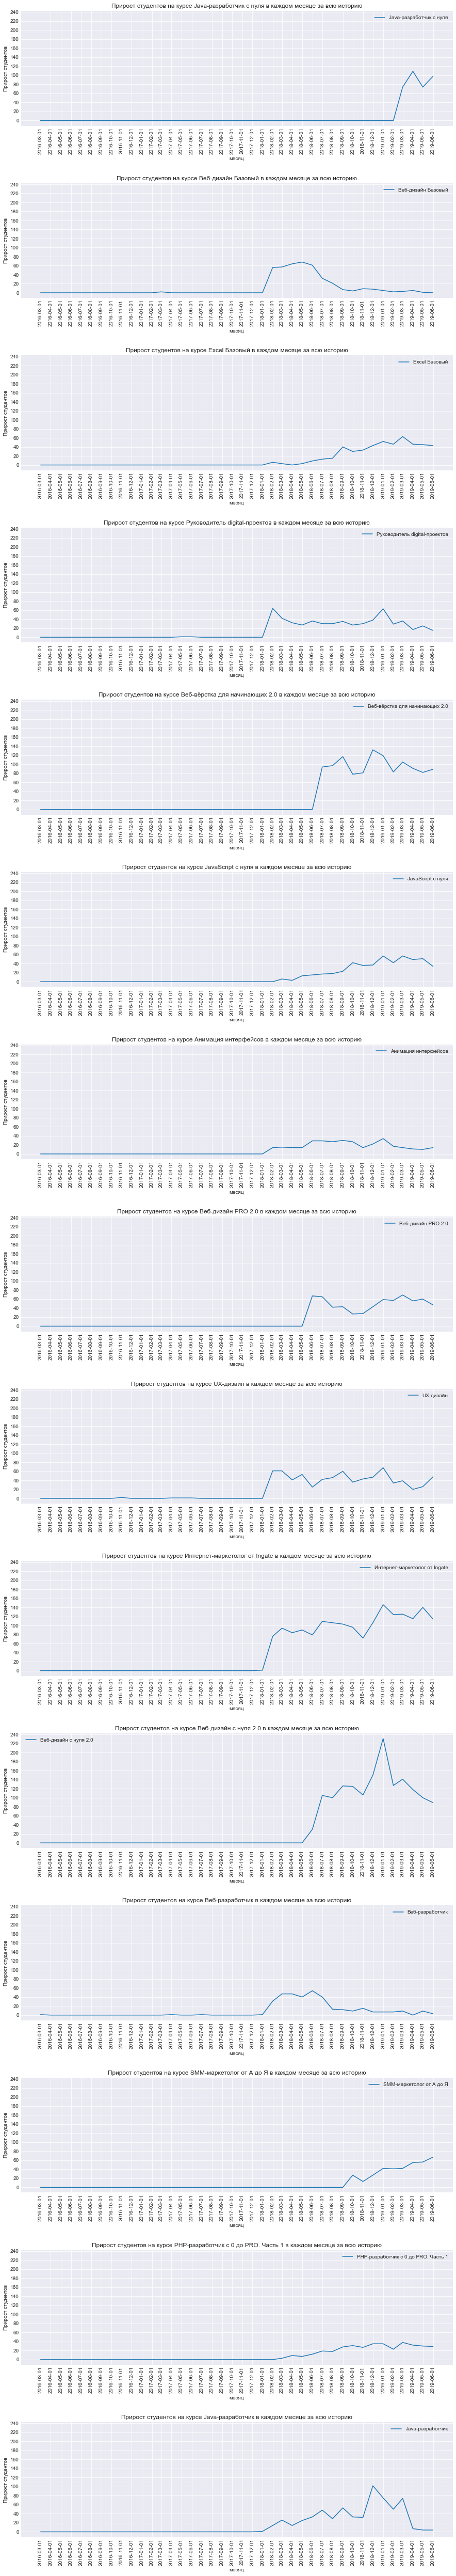

In [59]:
fig, axs = plt.subplots(15,1, sharey=True, figsize=(15,90))
plt.subplots_adjust(hspace=0.5)
i_2_2m = 0
for course in list_courses_title:
    data_2 = df_main_2[df_main_2['course_title'] == course]\
        .drop(['course_title'], axis='columns')
    sns.lineplot(x='check_month', y='new_students_amount', data=data_2, ax=axs[i_2_2m], label=course)
    axs[i_2_2m].set_xlabel('месяц')
    axs[i_2_2m].set_ylabel('Прирост студентов')
    axs[i_2_2m].set_xticks(list_xticks)
    axs[i_2_2m].tick_params(axis = 'x', rotation=90)
    title_graph = 'Прирост студентов на курсе ' + course + ' в каждом месяце за всю историю'
    axs[i_2_2m].set_title(title_graph)
    i_2_2m += 1

axs[14].set_yticks(list_yticks)
# ax.legend()
plt.show()

(m) На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

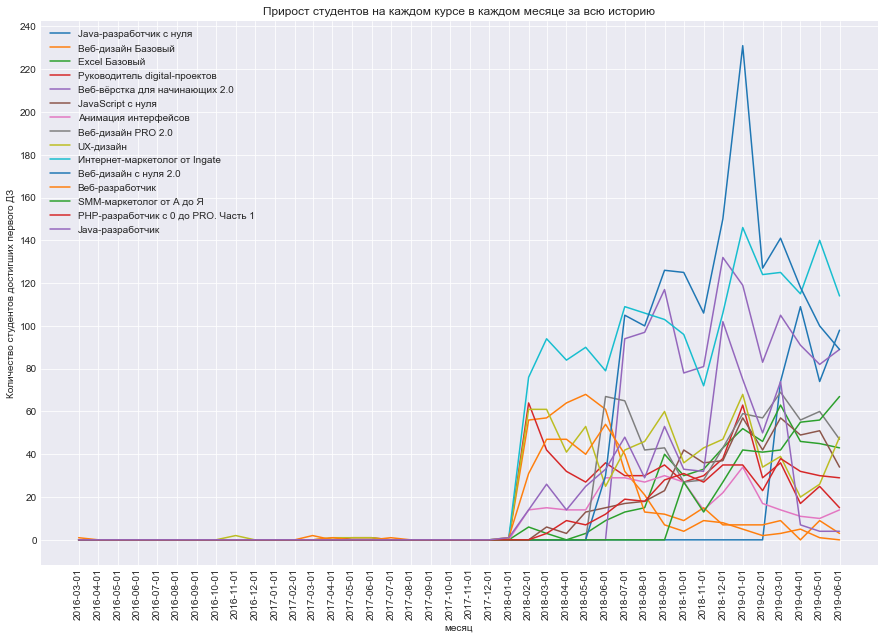

In [60]:
fig, ax = plt.subplots(figsize=(15,10))

for course in list_courses_title:
    data_2 = df_main_2[df_main_2['course_title'] == course]\
        .drop(['course_title'], axis='columns')
    sns.lineplot(x='check_month', y='new_students_amount', data=data_2, ax=ax, label=course)

ax.set_title('Прирост студентов на каждом курсе в каждом месяце за всю историю')
ax.set_xlabel('месяц')
ax.set_ylabel('Количество студентов достигших первого ДЗ')
ax.set_xticks(list_xticks)
ax.set_yticks(list_yticks)
ax.tick_params(axis = 'x', rotation=90)
ax.legend()
plt.show()

Диаграмма годов НАЧАЛА обучения студентов


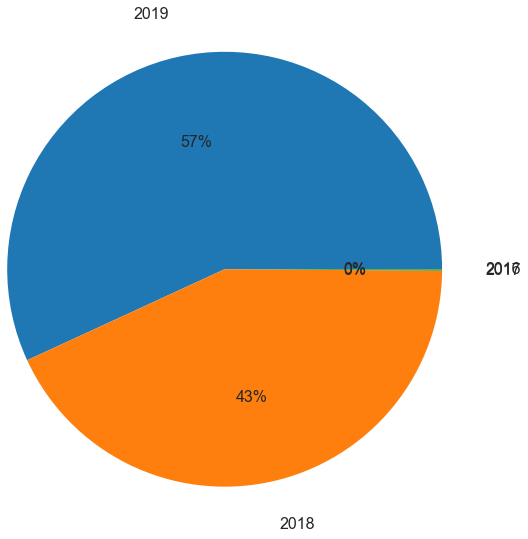

In [61]:
print('Диаграмма годов НАЧАЛА обучения студентов')
fig, axs = plt.subplots(1, 1, sharey=True, figsize=(5,5))
plot = df_master_progresses['start_date'].dt.year\
            .value_counts()\
            .plot\
            .pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2, ax=axs)

4. (p) Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [62]:
def f_date_range_list(row):
    list_1 = pd.date_range(row['start_date']- timedelta(days=row['start_date'].day),
                           row['finish_date'], freq='MS').strftime("%Y-%m-%d").tolist()
    return list_1

In [63]:
# Выберем нужные столбцы из основного датафрейма
# Высветим строки, которые соотвествуют домашнему зданию (без привязки к его номеру)
df_main_2_4 = df_main[['course_title','is_homework','start_date','finish_date','progress_id', 'status']]\
                    [(df_main['is_homework'] == True)]\
                    .sort_values('start_date')
# Дадим столбцам дат более удобный формат
df_main_2_4['start_date'] =  pd.to_datetime(df_main_2_4["start_date"].dt.strftime('%Y-%m'))
df_main_2_4['finish_date'] =  pd.to_datetime(df_main_2_4["finish_date"].dt.strftime('%Y-%m'))

# Дадим прогрессам со статусом "start", 'wait' и "fail" дату конца ДЗ соовтественно дате начала
df_main_2_4['finish_date'][df_main_2_4['status'] == 'start'] = df_main_2_4['start_date'][df_main_2_4['status'] == 'start']
df_main_2_4['finish_date'][df_main_2_4['status'] == 'wait'] = df_main_2_4['start_date'][df_main_2_4['status'] == 'wait']
df_main_2_4['finish_date'][df_main_2_4['status'] == 'fail'] = df_main_2_4['start_date'][df_main_2_4['status'] == 'fail']

# Создадим столбец со списком месяцев в которых делалось каждое ДЗ
df_main_2_4['check_month'] = df_main_2_4[['start_date', 'finish_date']].apply(f_date_range_list, axis=1)

# Распарсим список месяцев, задав для для каждого новую строку в искодной таблице
# Затем сгруппируем по курсам и месяцам, найдем количество прогрессов в каждом месяце
df_main_2_4 = df_main_2_4[['course_title', 'check_month', 'progress_id']]\
            .explode('check_month')\
            .sort_values(['course_title','check_month'])\
                    .groupby(['course_title','check_month'])\
                    .agg('count')\
                    .reset_index()\
                    .rename(columns={'progress_id':'progresses_amount'})

# Вернём стобцу месяцев тип дат.
df_main_2_4['check_month'] =  pd.to_datetime(df_main_2_4['check_month'], format='%Y-%m')

df_main_2_4

course_title check_month  progresses_amount
0                    Excel Базовый  2018-02-01                 37
1                    Excel Базовый  2018-03-01                  7
2                    Excel Базовый  2018-04-01                 13
3                    Excel Базовый  2018-05-01                 17
4                    Excel Базовый  2018-06-01                 37
..                             ...         ...                ...
253  Руководитель digital-проектов  2019-03-01                385
254  Руководитель digital-проектов  2019-04-01                284
255  Руководитель digital-проектов  2019-05-01                291
256  Руководитель digital-проектов  2019-06-01                231
257  Руководитель digital-проектов  2019-07-01                174

[258 rows x 3 columns]

In [64]:
df_main_2_4 = data_df_course.drop('new_students_amount_2', axis='columns')\
                            .merge(df_main_2_4[
                                    (df_main_2_4['check_month'] <= data_df_course['check_month'].max()) &
                                    (df_main_2_4['check_month'] >= data_df_course['check_month'].min())
                                                ],
                                 left_on=['check_month', 'course_title'],
                                 right_on=['check_month', 'course_title'],
                                 how='outer')\
                                .sort_values(['course_title','check_month'])

df_main_2_4['progresses_amount'] = df_main_2_4['progresses_amount'].fillna(0).astype(int)
df_main_2_4

check_month                   course_title  progresses_amount
80   2016-03-01                  Excel Базовый                  0
81   2016-04-01                  Excel Базовый                  0
82   2016-05-01                  Excel Базовый                  0
83   2016-06-01                  Excel Базовый                  0
84   2016-07-01                  Excel Базовый                  0
..          ...                            ...                ...
155  2019-02-01  Руководитель digital-проектов                374
156  2019-03-01  Руководитель digital-проектов                385
157  2019-04-01  Руководитель digital-проектов                284
158  2019-05-01  Руководитель digital-проектов                291
159  2019-06-01  Руководитель digital-проектов                231

[600 rows x 3 columns]

5 (m) Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы

In [65]:
list_yticks_2 = list(range(0, df_main_2_4['progresses_amount'].max() + 1, 200))

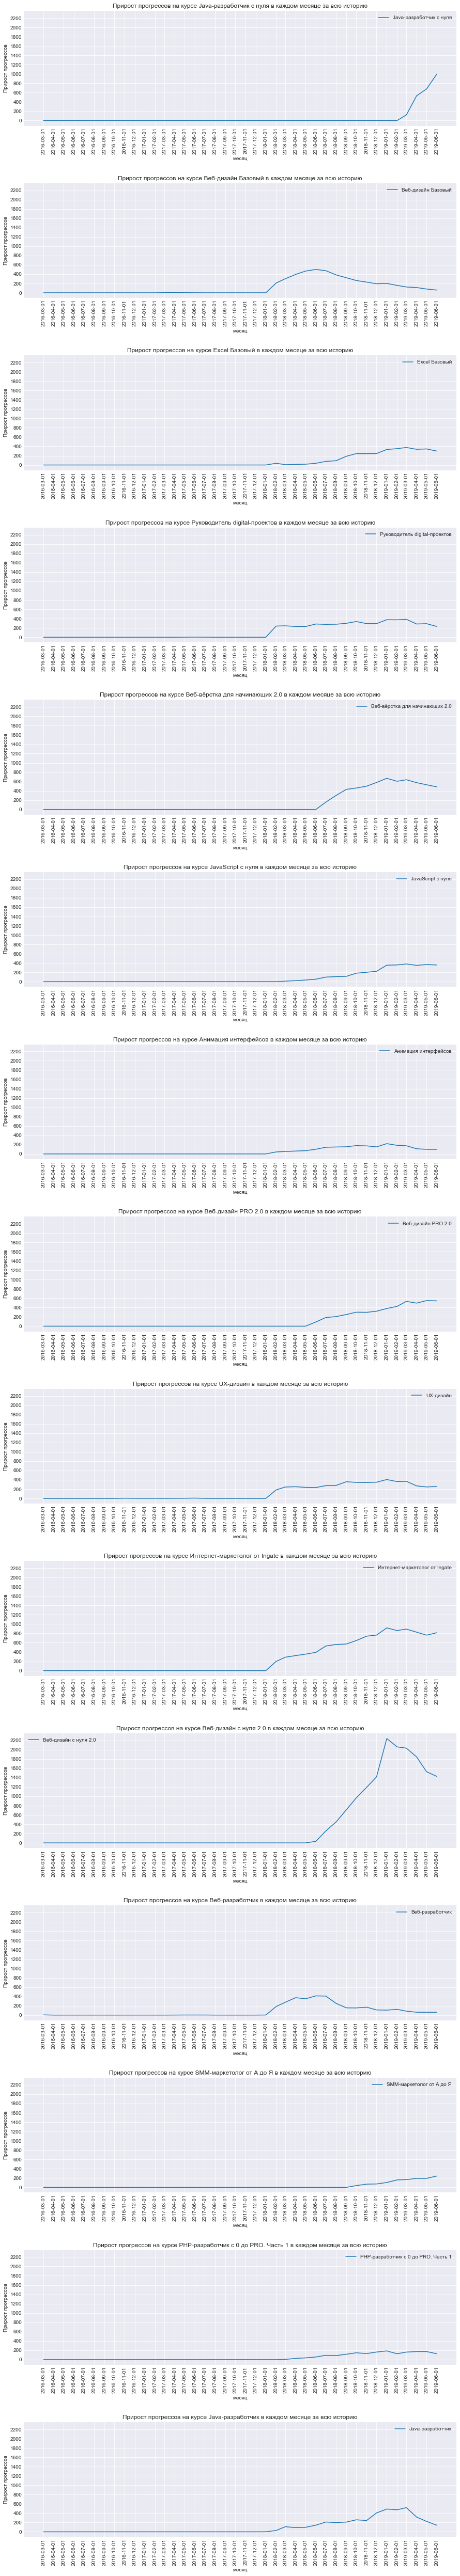

In [66]:
fig, axs = plt.subplots(15,1, sharey=True, figsize=(15,90))
plt.subplots_adjust(hspace=0.5)
i_2_2m = 0
for course in list_courses_title:
    data_2 = df_main_2_4[df_main_2_4['course_title'] == course]\
        .drop(['course_title'], axis='columns')
    sns.lineplot(x='check_month', y='progresses_amount', data=data_2, ax=axs[i_2_2m], label=course)
    axs[i_2_2m].set_xlabel('месяц')
    axs[i_2_2m].set_ylabel('Прирост прогрессов')
    axs[i_2_2m].set_xticks(list_xticks)
    title_graph = 'Прирост прогрессов на курсе ' + course + ' в каждом месяце за всю историю'
    axs[i_2_2m].set_title(title_graph)
    axs[i_2_2m].tick_params(axis = 'x', rotation=90)
    i_2_2m += 1
axs[14].set_yticks(list_yticks_2)
# ax.legend()
plt.show()

6 (m) Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

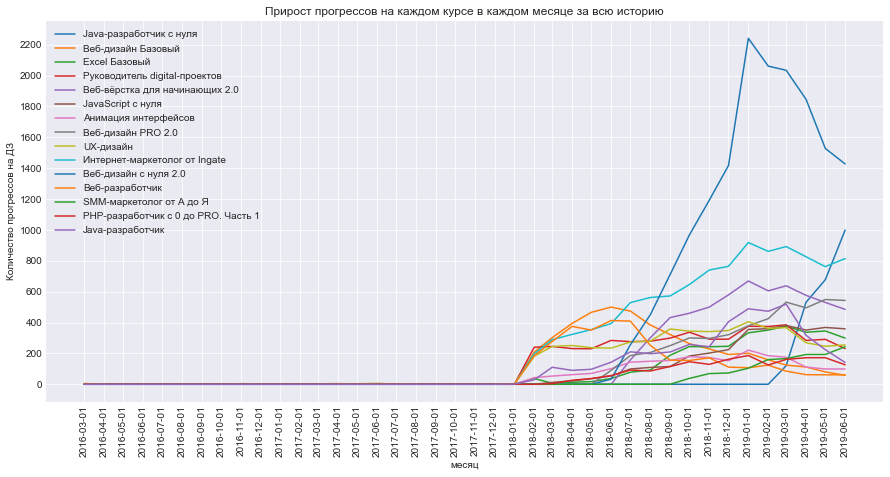

In [67]:
fig, ax = plt.subplots(figsize=(15,7))

for course in list_courses_title:
    data_2 = df_main_2_4[df_main_2_4['course_title'] == course]\
        .drop(['course_title'], axis='columns')
    sns.lineplot(x='check_month', y='progresses_amount', data=data_2, ax=ax, label=course)

ax.set_title('Прирост прогрессов на каждом курсе в каждом месяце за всю историю')
ax.set_xlabel('месяц')
ax.set_ylabel('Количество прогрессов на ДЗ')
ax.set_xticks(list_xticks)
ax.set_yticks(list_yticks_2)
ax.tick_params(axis = 'x', rotation=90)
ax.legend()
plt.show()

7 На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [68]:
df_main_2[df_main_2['new_students_amount'] != 0]

check_month             course_title  new_students_amount
36   2019-03-01  Java-разработчик c нуля                   74
37   2019-04-01  Java-разработчик c нуля                  109
38   2019-05-01  Java-разработчик c нуля                   74
39   2019-06-01  Java-разработчик c нуля                   98
52   2017-03-01       Веб-дизайн Базовый                    2
..          ...                      ...                  ...
595  2019-02-01         Java-разработчик                   50
596  2019-03-01         Java-разработчик                   74
597  2019-04-01         Java-разработчик                    7
598  2019-05-01         Java-разработчик                    4
599  2019-06-01         Java-разработчик                    4

[229 rows x 3 columns]

In [69]:
df_main_2[df_main_2['new_students_amount'] != 0][['course_title', 'new_students_amount']]\
        .groupby(['course_title'])\
        .agg(['mean','median','min', 'max']).round(1)

new_students_amount                
                                                   mean median min  max
course_title                                                           
Excel Базовый                                      30.6   36.5   3   63
Java-разработчик                                   34.7   30.5   1  102
Java-разработчик c нуля                            88.8   86.0  74  109
JavaScript с нуля                                  31.2   35.0   3   57
PHP-разработчик с 0 до PRO. Часть 1                23.5   27.5   3   38
SMM-маркетолог от А до Я                           41.1   42.0  13   67
UX-дизайн                                          36.0   41.0   1   68
Анимация интерфейсов                               19.7   15.0  10   34
Веб-вёрстка для начинающих 2.0                     97.3   92.5  78  132
Веб-дизайн PRO 2.0                                 51.0   56.0  27   69
Веб-дизайн Базовый                                 23.8    8.0   1   68
Веб-дизайн с нуля 2.0                             119.1  118.0  30  231
Веб-разработчик                                    17.7    9.0   1   54
Интернет-маркетолог от Ingate                      98.9  104.5   1  146
Руководитель digital-проектов                      30.4   30.0   1   64

In [70]:
df_main_2[df_main_2['new_students_amount'] != 0][['course_title', 'new_students_amount']]\
        .groupby(['course_title']).agg('mean').round(1).sort_values(by='new_students_amount', ascending=False).iloc[[0,-1],:]

new_students_amount
course_title                              
Веб-дизайн с нуля 2.0                119.1
Веб-разработчик                       17.7

In [71]:
df_main_2[df_main_2['new_students_amount'] != 0][['course_title', 'new_students_amount']]\
        .groupby(['course_title']).agg('median').round(1).sort_values(by='new_students_amount', ascending=False).iloc[[0,-1],:]

new_students_amount
course_title                              
Веб-дизайн с нуля 2.0                118.0
Веб-дизайн Базовый                     8.0

In [72]:
df_main_2[df_main_2['new_students_amount'] != 0][['course_title', 'new_students_amount']]\
        .groupby(['course_title']).agg('max').round(1).sort_values(by='new_students_amount', ascending=False).iloc[[0,-1],:]

new_students_amount
course_title                              
Веб-дизайн с нуля 2.0                  231
Анимация интерфейсов                    34

In [73]:
df_main_2[df_main_2['new_students_amount'] != 0][['course_title', 'new_students_amount']]\
        .groupby(['course_title']).agg('min').round(1).sort_values(by='new_students_amount', ascending=False).iloc[[0,-1],:]

new_students_amount
course_title                                       
Веб-вёрстка для начинающих 2.0                   78
Руководитель digital-проектов                     1

In [74]:
df_main_2[df_main_2['new_students_amount'] != 0][['new_students_amount']]\
        .agg(['mean','median','min', 'max']).round(1)

new_students_amount
mean                   45.0
median                 35.0
min                     1.0
max                   231.0

In [75]:
df_main_2[['course_title', 'new_students_amount']]\
        .groupby(['course_title'])\
        .agg(['mean','median','min', 'max']).round(1)

new_students_amount                
                                                   mean median min  max
course_title                                                           
Excel Базовый                                      12.2    0.0   0   63
Java-разработчик                                   15.6    0.0   0  102
Java-разработчик c нуля                             8.9    0.0   0  109
JavaScript с нуля                                  12.5    0.0   0   57
PHP-разработчик с 0 до PRO. Часть 1                 9.4    0.0   0   38
SMM-маркетолог от А до Я                            9.2    0.0   0   67
UX-дизайн                                          18.9    1.0   0   68
Анимация интерфейсов                                8.4    0.0   0   34
Веб-вёрстка для начинающих 2.0                     29.2    0.0   0  132
Веб-дизайн PRO 2.0                                 16.6    0.0   0   69
Веб-дизайн Базовый                                 10.1    0.0   0   68
Веб-дизайн с нуля 2.0                              38.7    0.0   0  231
Веб-разработчик                                     8.8    0.5   0   54
Интернет-маркетолог от Ingate                      44.5    0.0   0  146
Руководитель digital-проектов                      14.4    0.0   0   64

In [76]:
df_main_2[['course_title', 'new_students_amount']]\
        .groupby(['course_title']).agg('mean').round(1).sort_values(by='new_students_amount', ascending=False).iloc[[0,-1],:]

new_students_amount
course_title                                      
Интернет-маркетолог от Ingate                 44.5
Анимация интерфейсов                           8.4

In [77]:
df_main_2[['new_students_amount']]\
        .agg(['mean','median','min', 'max']).round(1)

new_students_amount
mean                   17.2
median                  0.0
min                     0.0
max                   231.0

In [78]:
df_main_2_4[df_main_2_4['progresses_amount'] != 0]

check_month                   course_title  progresses_amount
103  2018-02-01                  Excel Базовый                 37
104  2018-03-01                  Excel Базовый                  7
105  2018-04-01                  Excel Базовый                 13
106  2018-05-01                  Excel Базовый                 17
107  2018-06-01                  Excel Базовый                 37
..          ...                            ...                ...
155  2019-02-01  Руководитель digital-проектов                374
156  2019-03-01  Руководитель digital-проектов                385
157  2019-04-01  Руководитель digital-проектов                284
158  2019-05-01  Руководитель digital-проектов                291
159  2019-06-01  Руководитель digital-проектов                231

[243 rows x 3 columns]

In [79]:
df_main_2_4[df_main_2_4['progresses_amount'] != 0][['course_title', 'progresses_amount']]\
        .groupby(['course_title'])\
        .agg(['mean','median','min', 'max']).round(1)

progresses_amount                   
                                                 mean  median  min   max
course_title                                                            
Excel Базовый                                   190.8   243.0    7   376
Java-разработчик                                230.9   209.5    1   519
Java-разработчик c нуля                         581.8   604.0  120   999
JavaScript с нуля                               201.9   192.5   12   381
PHP-разработчик с 0 до PRO. Часть 1             112.2   125.5    4   186
SMM-маркетолог от А до Я                        137.7   160.0   38   243
UX-дизайн                                       193.0   245.5    1   405
Анимация интерфейсов                            127.6   143.0   43   221
Веб-вёрстка для начинающих 2.0                  494.4   515.0  158   669
Веб-дизайн PRO 2.0                              351.8   321.0   90   549
Веб-дизайн Базовый                              213.3   201.0    1   500
Веб-дизайн с нуля 2.0                          1243.3  1417.0   33  2241
Веб-разработчик                                 146.4   111.0    1   413
Интернет-маркетолог от Ingate                   580.2   609.0    1   918
Руководитель digital-проектов                   247.5   281.5    1   385

In [80]:
df_main_2_4[df_main_2_4['progresses_amount'] != 0][['course_title', 'progresses_amount']]\
        .groupby(['course_title']).agg('mean').round(1).sort_values(by='progresses_amount', ascending=False).iloc[[0,-1],:]

progresses_amount
course_title                                          
Веб-дизайн с нуля 2.0                           1243.3
PHP-разработчик с 0 до PRO. Часть 1              112.2

In [81]:
df_main_2_4[df_main_2_4['progresses_amount'] != 0][['course_title', 'progresses_amount']]\
        .groupby(['course_title']).agg('median').round(1).sort_values(by='progresses_amount', ascending=False).iloc[[0,-1],:]

progresses_amount
course_title                            
Веб-дизайн с нуля 2.0             1417.0
Веб-разработчик                    111.0

In [82]:
df_main_2_4[df_main_2_4['progresses_amount'] != 0][['course_title', 'progresses_amount']]\
        .groupby(['course_title']).agg('min').round(1).sort_values(by='progresses_amount', ascending=False).iloc[[0,-1],:]

progresses_amount
course_title                                     
Веб-вёрстка для начинающих 2.0                158
Руководитель digital-проектов                   1

In [83]:
df_main_2_4[df_main_2_4['progresses_amount'] != 0][['course_title', 'progresses_amount']]\
        .groupby(['course_title']).agg('max').round(1).sort_values(by='progresses_amount', ascending=False).iloc[[0,-1],:]

progresses_amount
course_title                                          
Веб-дизайн с нуля 2.0                             2241
PHP-разработчик с 0 до PRO. Часть 1                186

In [84]:
df_main_2_4[df_main_2_4['progresses_amount'] != 0][['progresses_amount']].agg(['mean','median','min', 'max']).round(1)

progresses_amount
mean                300.8
median              230.0
min                   1.0
max                2241.0

In [85]:
df_main_2_4[['course_title', 'progresses_amount']]\
        .groupby(['course_title'])\
        .agg(['mean','median','min', 'max']).round(1)

progresses_amount                 
                                                 mean median min   max
course_title                                                          
Excel Базовый                                    81.1    0.0   0   376
Java-разработчик                                103.9    0.0   0   519
Java-разработчик c нуля                          58.2    0.0   0   999
JavaScript с нуля                                80.8    0.0   0   381
PHP-разработчик с 0 до PRO. Часть 1              44.9    0.0   0   186
SMM-маркетолог от А до Я                         31.0    0.0   0   243
UX-дизайн                                       125.5    2.5   0   405
Анимация интерфейсов                             54.2    0.0   0   221
Веб-вёрстка для начинающих 2.0                  148.3    0.0   0   669
Веб-дизайн PRO 2.0                              114.3    0.0   0   549
Веб-дизайн Базовый                              112.0    1.5   0   500
Веб-дизайн с нуля 2.0                           404.1    0.0   0  2241
Веб-разработчик                                  84.2    2.0   0   413
Интернет-маркетолог от Ingate                   261.1    0.0   0   918
Руководитель digital-проектов                   123.8    0.5   0   385

In [86]:
df_main_2_4[['course_title', 'progresses_amount']]\
        .groupby(['course_title']).agg('mean').round(1).sort_values(by='progresses_amount', ascending=False).iloc[[0,-1],:]

progresses_amount
course_title                               
Веб-дизайн с нуля 2.0                 404.1
SMM-маркетолог от А до Я               31.0

In [87]:
df_main_2_4['progresses_amount'].agg(['mean','median','min', 'max']).round(1)

mean       121.8
median       0.0
min          0.0
max       2241.0
Name: progresses_amount, dtype: float64

### Общие выводы по 2му разделу:

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

1 Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [88]:
# возьмём нужные столбцы и удалим строки с пропущенными значениями
df_main_3_1_1 = df_main[['course_title', 'lesson_title', 'start_date', 'finish_date', 'module_number', 'progress_id']]\
                    .dropna()
# уберём строки, не относящиеся к домашнему заданию
df_main_3_1_1['lesson_title'] = df_main_3_1_1['lesson_title'].apply(f_HT_detection)
df_main_3_1_1 = df_main_3_1_1[df_main_3_1_1['lesson_title'] != 'not_HT'].drop(['lesson_title'], axis='columns')

# сгруппируем строки по курсу - модулю и прогрессу,
# возьмём для каждого самую раннюю дату начала и самую познюю дату конца выполнения домашнего задания
df_main_3_1_1 = df_main_3_1_1.groupby(['course_title','module_number','progress_id'])\
                             .agg({'start_date':'min', 'finish_date':'max'})\
                             .reset_index()
# Сформируем столбец "delta_time" с количеством часов, затрачиваемым на домашнее задание
df_main_3_1_1['delta_time_day'] = ((df_main_3_1_1['finish_date'] - df_main_3_1_1['start_date'])\
                                .astype('timedelta64[s]')/60/60/24)

# удалим лишние столбцы
# возьмем только те ДЗ, которые люди делали, а не просто зачли (время выполнения больше нуля)
# сгруппируем по курсу и модулю, затем определим минимальное, максимальное, среднее и медианное количесво потраченых часов
df_main_3_1_1 = df_main_3_1_1[['course_title', 'module_number', 'delta_time_day']]\
                [df_main_3_1_1['delta_time_day'] > 0]\
                            .groupby(['course_title', 'module_number'])\
                            .agg(['min','max','mean','median'])\
                                .round(0)\
                                .astype(int)\
                                .reset_index()

# переименуем столбцы
df_main_3_1_1.columns=df_main_3_1_1.columns.droplevel(1)
df_main_3_1_1.columns = ['course_title',
                         'module_number',
                         'delta_time_min_day',
                         'delta_time_max_day',
                         'delta_time_mean_day',
                         'delta_time_median_day']

df_main_3_1_1

course_title  module_number  delta_time_min_day  \
0                    Excel Базовый              1                   0   
1                    Excel Базовый              2                   0   
2                    Excel Базовый              3                   0   
3                    Excel Базовый              4                   0   
4                    Excel Базовый              5                   0   
..                             ...            ...                 ...   
173  Руководитель digital-проектов             12                   0   
174  Руководитель digital-проектов             13                   1   
175  Руководитель digital-проектов             14                   1   
176  Руководитель digital-проектов             15                   0   
177  Руководитель digital-проектов             16                   1   

     delta_time_max_day  delta_time_mean_day  delta_time_median_day  
0                   184                    6                      2  
1                   184                    4                      2  
2                    89                    3                      2  
3                   328                   11                      3  
4                   176                    7                      3  
..                  ...                  ...                    ...  
173                 212                   23                      8  
174                 247                   29                     14  
175                 199                   17                      9  
176                 132                    8                      3  
177                 356                   21                      7  

[178 rows x 6 columns]

3 (p) Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса.

In [90]:
# возьмём нужные столбцы и удалим строки с пропущенными значениями
df_main_3_2_1 = df_main[['course_title', 'lesson_title', 'start_date', 'finish_date', 'progress_id']]\
                    .dropna()
# уберём строки, не относящиеся к домашнему заданию
df_main_3_2_1['lesson_title'] = df_main_3_2_1['lesson_title'].apply(f_HT_detection)
df_main_3_2_1 = df_main_3_2_1[df_main_3_2_1['lesson_title'] != 'not_HT'].drop(['lesson_title'], axis='columns')
# создадим столбец с месяцем начала выполнения ДЗ
df_main_3_2_1['month'] = df_main_3_2_1['start_date'].dt.month

# сгруппируем строки по курсу - месяцу и прогрессу,
# возьмём для каждого самую раннюю дату начала и самую познюю дату конца выполнения домашнего задания
df_main_3_2_1 = df_main_3_2_1.groupby(['course_title', 'month', 'progress_id'])\
                             .agg({'start_date':'min', 'finish_date':'max'})\
                             .reset_index()
# Сформируем столбец "delta_time" с количеством ДНЕЙ, затрачиваемым на домашнее задание
df_main_3_2_1['delta_time'] = ((df_main_3_2_1['finish_date'] - df_main_3_2_1['start_date'])\
                                .astype('timedelta64[s]')/60/60/24)

# удалим лишние столбцы
# возьмем только те ДЗ, которые люди делали, а не просто зачли (время выполнения больше нуля)
# сгруппируем по курсу и модулю, затем определим медианное количесво потраченых ДНЕЙ
df_main_3_2_1 = df_main_3_2_1[['course_title', 'month', 'delta_time']]\
                [df_main_3_2_1['delta_time'] > 0]\
                            .groupby(['course_title', 'month'])\
                            .agg(['median'])\
                                .round(0)\
                                .astype(int)\
                                .reset_index()

# переименуем столбец
df_main_3_2_1.columns=df_main_3_2_1.columns.droplevel(1)
df_main_3_2_1 = df_main_3_2_1.rename(columns={'delta_time':'delta_time_median_days'})
df_main_3_2_1

course_title  month  delta_time_median_days
0                    Excel Базовый      1                      10
1                    Excel Базовый      2                      12
2                    Excel Базовый      3                       9
3                    Excel Базовый      4                      11
4                    Excel Базовый      5                      11
..                             ...    ...                     ...
166  Руководитель digital-проектов      8                      31
167  Руководитель digital-проектов      9                      23
168  Руководитель digital-проектов     10                      24
169  Руководитель digital-проектов     11                      28
170  Руководитель digital-проектов     12                      27

[171 rows x 3 columns]

### Общие выводы по 3му разделу:

(p) Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [123]:
# время прохождения каждого модуля собрано в специальный Датафрейм:
df_main_3_1_1

course_title  module_number  delta_time_min_day  \
0                    Excel Базовый              1                   0   
1                    Excel Базовый              2                   0   
2                    Excel Базовый              3                   0   
3                    Excel Базовый              4                   0   
4                    Excel Базовый              5                   0   
..                             ...            ...                 ...   
173  Руководитель digital-проектов             12                   0   
174  Руководитель digital-проектов             13                   1   
175  Руководитель digital-проектов             14                   1   
176  Руководитель digital-проектов             15                   0   
177  Руководитель digital-проектов             16                   1   

     delta_time_max_day  delta_time_mean_day  delta_time_median_day  
0                   184                    6                      2  
1                   184                    4                      2  
2                    89                    3                      2  
3                   328                   11                      3  
4                   176                    7                      3  
..                  ...                  ...                    ...  
173                 212                   23                      8  
174                 247                   29                     14  
175                 199                   17                      9  
176                 132                    8                      3  
177                 356                   21                      7  

[178 rows x 6 columns]

In [121]:
# Средние значения данных промежутков по курсам следующие:
df_main_3_1_1_mean = df_main_3_1_1.copy().groupby('course_title').agg('mean').round(1).drop(columns = 'module_number')

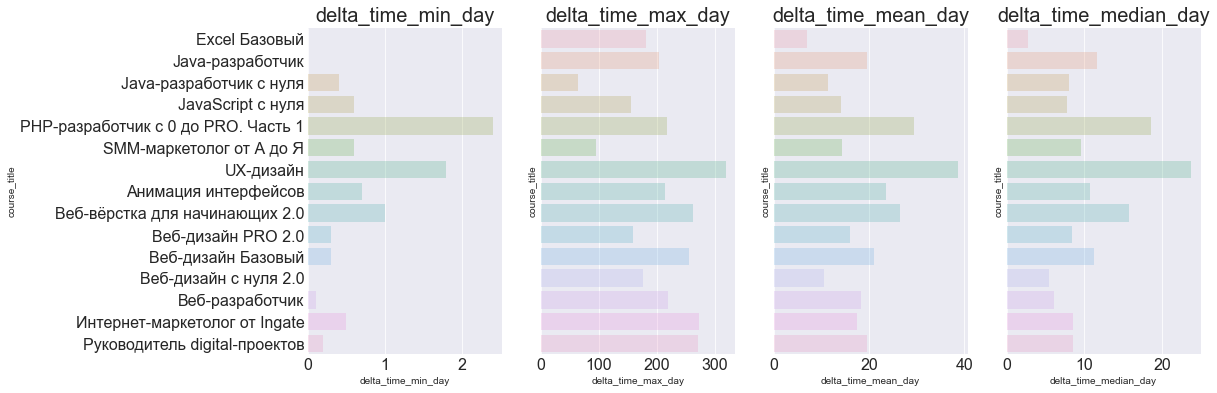

In [122]:
temp_df_for_graph = df_main_3_1_1_mean.copy()
columns_list_temp_for_graph = temp_df_for_graph.columns.tolist()

f,axs=plt.subplots(1, 4, sharey= True, figsize=(16,6))
column_number = 0

for k_ in range(4):
        ax = axs[k_]
        column_name = columns_list_temp_for_graph[k_]
        sns.barplot(y=temp_df_for_graph.index,
                    x=column_name,
                    data=temp_df_for_graph,
                    alpha=0.25,
                    ax=axs[k_])
        ax.set_title(column_name, fontsize=20)
        ax.tick_params(labelsize=16)
plt.show()

(m) На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки

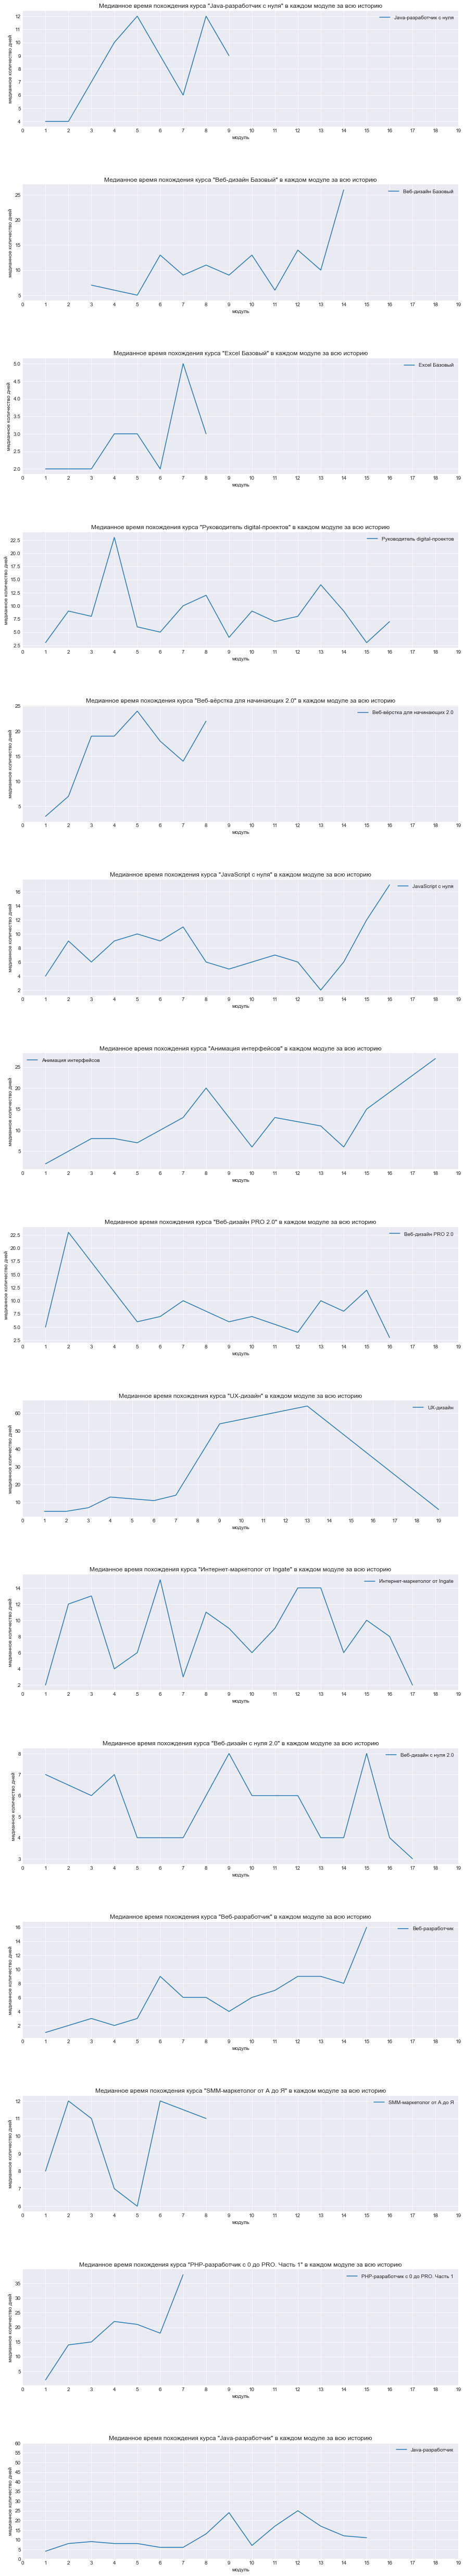

In [139]:
list_yticks_3_2 = list(range(0, df_main_3_1_1['delta_time_median_day'].max() + 1, 5))
list_xticks_3_2 = list(range(0, df_main_3_1_1['module_number'].max() + 1, 1))


fig, axs = plt.subplots(15,1, figsize=(15,90))
plt.subplots_adjust(hspace=0.5)
i_3_2m = 0
for course in list_courses_title:
    data_2 = df_main_3_1_1[df_main_3_1_1['course_title'] == course]\
        .drop(['course_title'], axis='columns')
    sns.lineplot(x='module_number', y='delta_time_median_day', data=data_2, ax=axs[i_3_2m], label=course)
    axs[i_3_2m].set_xlabel('модуль')
    axs[i_3_2m].set_ylabel('медианное количество дней')
    axs[i_3_2m].set_xticks(list_xticks_3_2)
    title_graph = 'Медианное время похождения курса "' + course + '" в каждом модуле за всю историю'
    axs[i_3_2m].set_title(title_graph)
#     axs[i_3_2m].tick_params(axis = 'x', rotation=90)
    i_3_2m += 1
axs[14].set_yticks(list_yticks_3_2)
# ax.legend()
plt.show()

In [126]:
# Данные собраны в датафрейм ниже:
df_main_3_2_1

course_title  month  delta_time_median_days
0                    Excel Базовый      1                      10
1                    Excel Базовый      2                      12
2                    Excel Базовый      3                       9
3                    Excel Базовый      4                      11
4                    Excel Базовый      5                      11
..                             ...    ...                     ...
166  Руководитель digital-проектов      8                      31
167  Руководитель digital-проектов      9                      23
168  Руководитель digital-проектов     10                      24
169  Руководитель digital-проектов     11                      28
170  Руководитель digital-проектов     12                      27

[171 rows x 3 columns]

In [137]:
mean_days_per_month = round(df_main_3_2_1.copy().groupby('month').agg('mean')).astype(int)

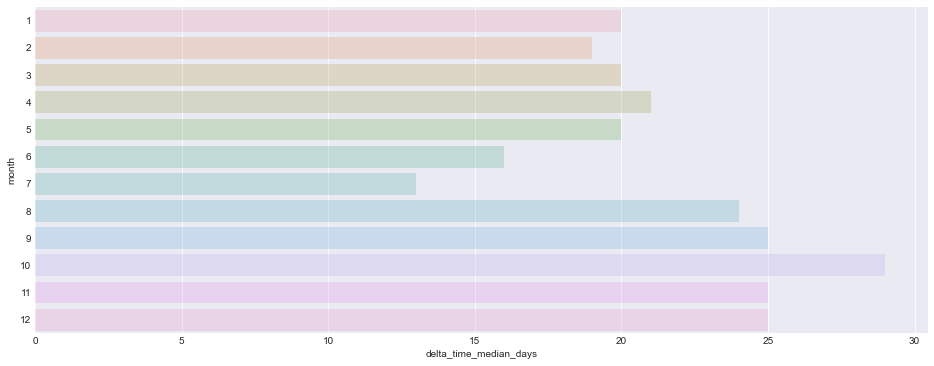

In [138]:
temp_df_for_graph = mean_days_per_month.copy()

f,axs=plt.subplots(figsize=(16,6))
sns.barplot(y=temp_df_for_graph.index.astype(str),
                    x='delta_time_median_days',
                    data=temp_df_for_graph,
                    alpha=0.25,
                    ax=axs)
plt.show()

(m) На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

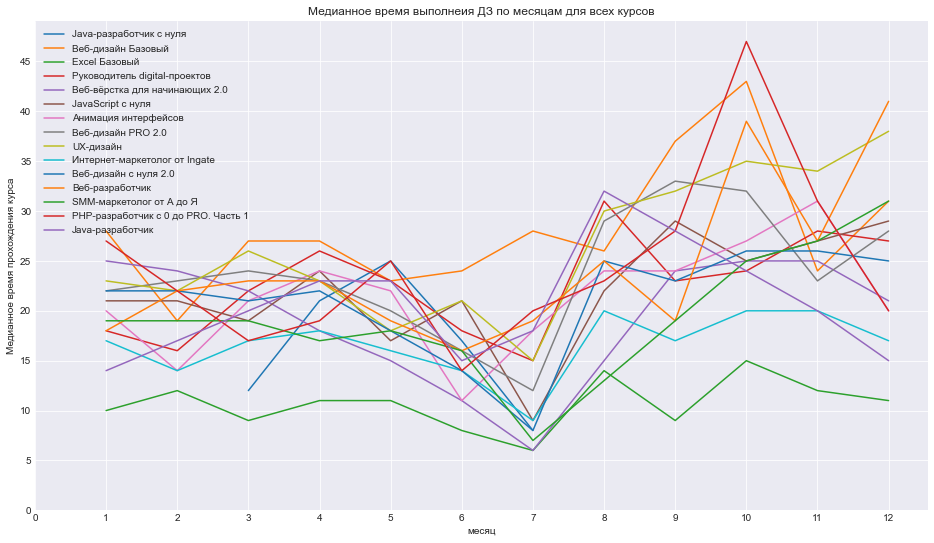

In [140]:
list_yticks_3_4 = list(range(0, df_main_3_2_1['delta_time_median_days'].max() + 1, 5))
list_xticks_3_4 = list(range(0, df_main_3_2_1['month'].max() + 1, 1))

fig, ax = plt.subplots(figsize=(16,9))

for course in list_courses_title:
    data_2 = df_main_3_2_1[df_main_3_2_1['course_title'] == course]\
        .drop(['course_title'], axis='columns')
    sns.lineplot(x='month', y='delta_time_median_days', data=data_2, ax=ax, label=course)

ax.set_title('Медианное время выполнеия ДЗ по месяцам для всех курсов')
ax.set_xlabel('месяц')
ax.set_ylabel('Медианное время прохождения курса')
ax.set_xticks(list_xticks_3_4)
ax.set_yticks(list_yticks_3_4)
# ax.tick_params(axis = 'x', rotation=90)
ax.legend()
plt.show()

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

(p) Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).




In [92]:
# возьмём нужные столбцы и удалим строки с пропущенными значениями
df_main_4_1_1 = df_main[['course_title', 'lesson_title', 'start_date', 'finish_date', 'module_number', 'student_id', 'status']]\
                    .sort_values(['course_title','module_number'])
# построим таблицу студентов начавших модули
df_main_4_start_1 = df_main_4_1_1[['course_title', 'module_number', 'student_id']][
                            (df_main_4_1_1['lesson_title'] == 'Домашняя работа')
                            |
                            (df_main_4_1_1['lesson_title'] == 'Домашняя работа 4.1')
                            |
                            (df_main_4_1_1['lesson_title'] == 'Домашняя работа 5.1')
                            |
                            (df_main_4_1_1['lesson_title'] == 'Домашняя работа (первая часть)')
                             ]\
                                .groupby(['course_title', 'module_number'])\
                                .agg('nunique')\
                                .reset_index()\
                                .rename(columns={'student_id':'student_start_amount', 'module_number':'module_number_start'})

# построим таблицу студентов, закончивших мудули
df_main_4_finish_1 = df_main_4_1_1[['course_title', 'module_number', 'student_id']]\
                                [
                            (
                                (df_main_4_1_1['lesson_title'] == 'Домашняя работа')
                                |
                                (df_main_4_1_1['lesson_title'] == 'Домашняя работа 4.6')
                                |
                                (df_main_4_1_1['lesson_title'] == 'Домашняя работа 5.5')
                                |
                                (df_main_4_1_1['lesson_title'] == 'Домашняя работа (вторая часть)')
                            )
                            &
                                (df_main_4_1_1['status'] == 'done')
                                ]\
                                .groupby(['course_title', 'module_number'])\
                                .agg('nunique')\
                                .reset_index()\
                                .rename(columns={'student_id':'student_finish_amount', 'module_number':'module_number_finish'})
df_main_4_finish_1['student_finish_amount'] = df_main_4_finish_1['student_finish_amount'].astype(int)

# введём специальный индекс, для объединения таблиц (т.к. сравнивать нужно с предыдущим модулем)
df_main_4_finish_1['special_index_finish'] = list(range(1,df_main_4_finish_1.shape[0]+1))
df_main_4_start_1['special_index_start'] = list(range(df_main_4_start_1.shape[0]))

# объединим таблицы
df_main_4_4_1 = df_main_4_start_1[df_main_4_start_1['module_number_start'] != 1]\
                                .merge(df_main_4_finish_1,
                                     left_on=['course_title', 'special_index_start'],
                                     right_on=['course_title', 'special_index_finish'],
                                     how='inner')

# определим конверсию
df_main_4_4_1['conversion_percent'] = round((df_main_4_4_1['student_start_amount']/df_main_4_4_1['student_finish_amount'])*100)
df_main_4_4_1['conversion_percent'] = df_main_4_4_1['conversion_percent'].astype(int)

# выведем таблицу с итоговыми данными на экран
df_main_4_4_1[['course_title',
               'module_number_start',
               'conversion_percent',
               'student_start_amount',
               'student_finish_amount',
               'module_number_finish']]

course_title  module_number_start  conversion_percent  \
0                    Excel Базовый                    2                  95   
1                    Excel Базовый                    3                  98   
2                    Excel Базовый                    4                  89   
3                    Excel Базовый                    5                  98   
4                    Excel Базовый                    6                  97   
..                             ...                  ...                 ...   
160  Руководитель digital-проектов                   12                 108   
161  Руководитель digital-проектов                   13                 126   
162  Руководитель digital-проектов                   14                 111   
163  Руководитель digital-проектов                   15                 103   
164  Руководитель digital-проектов                   16                 110   

     student_start_amount  student_finish_amount  module_number_finish  
0                     434                    458                     1  
1                     398                    406                     2  
2                     345                    387                     3  
3                     298                    303                     4  
4                     263                    270                     5  
..                    ...                    ...                   ...  
160                    95                     88                    12  
161                    87                     69                    13  
162                    71                     64                    14  
163                    66                     64                    15  
164                    64                     58                    16  

[165 rows x 6 columns]

2. (m) Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы

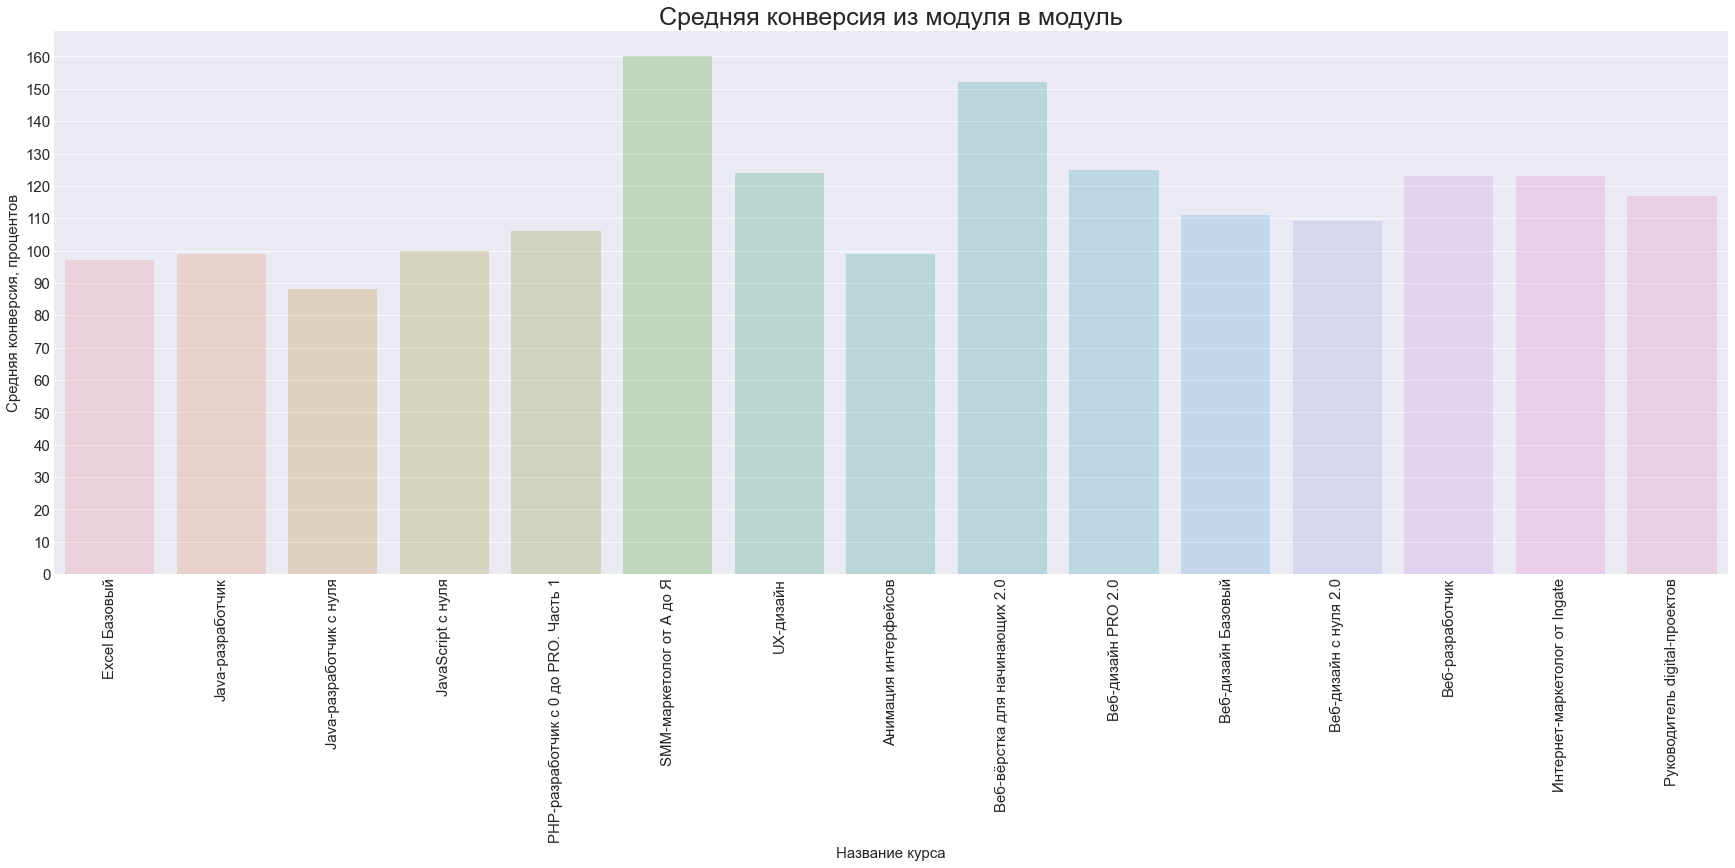

In [93]:
data_4_2 = df_main_4_4_1[['course_title', 'conversion_percent']].groupby('course_title').agg('mean').round(0).astype(int)

fig, ax = plt.subplots(figsize=(30,10))

ax.set_title("Средняя конверсия из модуля в модуль", fontsize=16, size=25)
sns.barplot(x=data_4_2.index,
            y=data_4_2['conversion_percent'],
            alpha=0.3,
            ax=ax)
ax.set_ylabel('Средняя конверсия, процентов',size=15)
ax.set_xlabel('Название курса',size=15)
ax.set_yticks( list(
                    range(0, int(data_4_2['conversion_percent'].max())+1, 10)
                    )
             )
ax.tick_params(labelsize=15)
ax.tick_params(axis = 'x', rotation=90)

plt.show()

3. (m) Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐

In [94]:
data_4_3 = df_main_4_4_1[['course_title', 'module_number_start', 'conversion_percent']]

# Добавим в таблицу количества студентов на курсах информацию об области- курса
data_4_3 = data_4_3.merge(df_courses[['title', 'field']],
                                     left_on='course_title',
                                     right_on='title',
                                     how='inner')\
                                    .drop('title', axis='columns')
# data_4_3

In [95]:
# Добавим в таблицу информацию о названии модуля
data_4_3_title = data_4_3.copy().merge(df_master_courses[['course_title','module_number', 'module_title']],
                                     left_on= ['course_title', 'module_number_start'],
                                     right_on= ['course_title','module_number'],
                                     how='inner').\
                                     drop_duplicates().\
                                     drop(columns = 'module_number')
# data_4_3_title

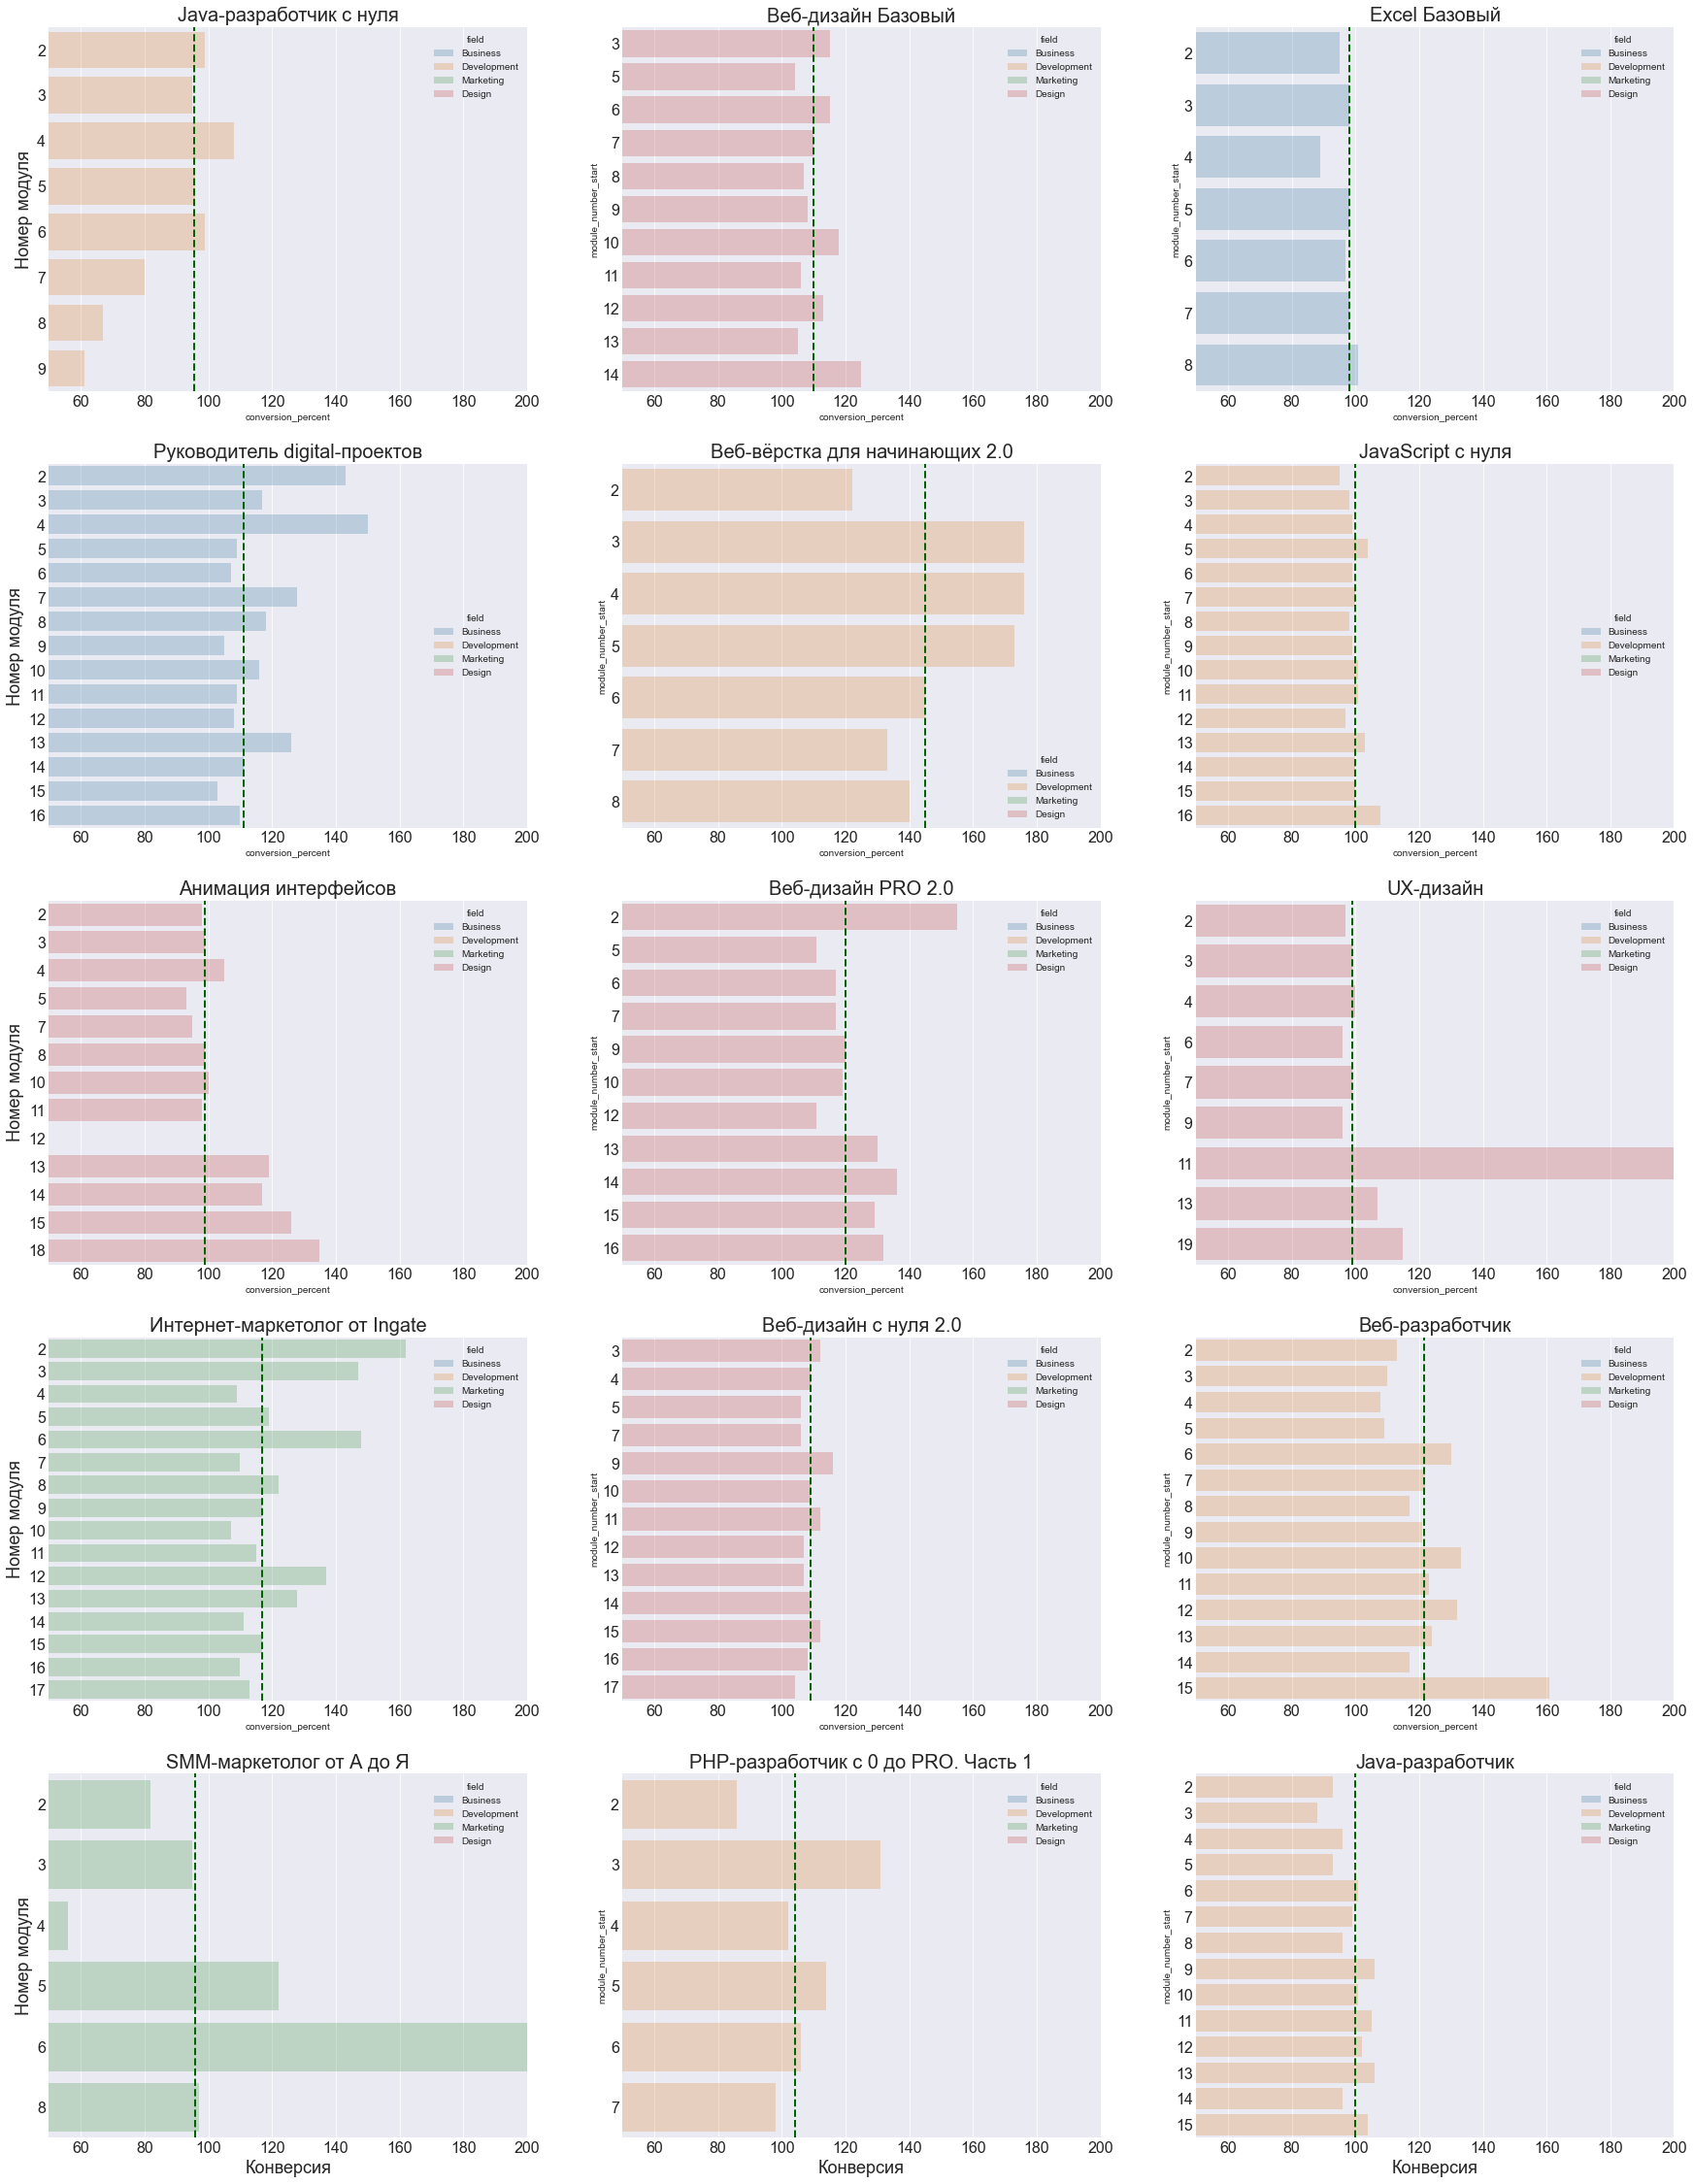

In [96]:
f,axs=plt.subplots(5, 3, figsize=(30,40))
course_number = 0

data_4_3_prepared = data_4_3_title.copy()
data_4_3_prepared['module_number_start'] = data_4_3_prepared['module_number_start'].astype(str)

for i_2_1 in range(5):
    for i_2_2 in range(3):
        ax = axs[i_2_1, i_2_2]
        course_name = df_courses['title'].tolist()[course_number]
        sns.barplot(y='module_number_start',
                    x='conversion_percent',
                    data=data_4_3_prepared[['conversion_percent','module_number_start']]\
                        [data_4_3_prepared['course_title'] == course_name],
                    alpha=0.25,
                    ax=axs[i_2_1, i_2_2],
                    hue = data_4_3_prepared['field'],
                    dodge=False)
        ax.set_title(course_name, fontsize=20)
        ax.tick_params(labelsize=16)
        ax.set_xticks( list(range( 60, 205, 20)))
        ax.set_xlim([50,200])
        if i_2_1 == 4:
            ax.set_xlabel('Конверсия', fontsize=18)
        if i_2_2 == 0:
            ax.set_ylabel('Номер модуля', fontsize=18)
        course_number +=1
        ax.axvline(x = data_4_3_prepared['conversion_percent'][data_4_3_prepared['course_title'] == course_name].median(),
           color='darkgreen',
           linewidth=2,
           linestyle='--')
plt.show()

### Общие выводы по 4му разделу:

4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

НЕОБХОДИМО ОТМЕТИТЬ, ЧТО ПО ИМЕЮЩИМСЯ ДАННЫМ И ТРЕБУЕМОЙ ФОРМУЛЕ КОНВЕРСИЯ МОЖЕТ ПРИНИМАТЬ ЗНАЧЕНИЯ ЗНАЧИТЕЛЬНО ПРЕВОСХОДЯЩИЕ 100%. ВИДИМО, В НЕКОТОРЫХ СЛУЧАЯХ, СТУДЕНТЫ ПРИСТУПАЮТ К ВЫПОЛНЕНИЮ ДОМАШНЕГО ЗАДАНИЯ, НЕ ВЫПОЛНИВ ДОМАШНЕЕ ЗАДАНИЕ ПО ПРЕДЫДУЩИМ МОДУЛЯМ.

In [143]:
df_main_4_4_1[['course_title',
               'module_number_start',
               'conversion_percent']]

course_title  module_number_start  conversion_percent
0                    Excel Базовый                    2                  95
1                    Excel Базовый                    3                  98
2                    Excel Базовый                    4                  89
3                    Excel Базовый                    5                  98
4                    Excel Базовый                    6                  97
..                             ...                  ...                 ...
160  Руководитель digital-проектов                   12                 108
161  Руководитель digital-проектов                   13                 126
162  Руководитель digital-проектов                   14                 111
163  Руководитель digital-проектов                   15                 103
164  Руководитель digital-проектов                   16                 110

[165 rows x 3 columns]

In [145]:
# Среди них (с особо низкой конверсией):
data_4_3_title[['course_title', 'module_title', 'conversion_percent']].\
                    sort_values(by = 'conversion_percent').head(3)

course_title              module_title  conversion_percent
504      Анимация интерфейсов           InVision Studio                   9
399  SMM-маркетолог от А до Я  Дизайн для не дизайнеров                  56
227   Java-разработчик c нуля  Работа с файлами и сетью                  61

In [146]:
# Среди них (с особо высокой конверсией):
data_4_3_title[['course_title', 'module_title', 'conversion_percent']].\
                    sort_values(by = 'conversion_percent', ascending=False).head(3)

course_title                     module_title  \
409        SMM-маркетолог от А до Я   Продвижение в VK, FB, MyTarget   
458                       UX-дизайн  Visual design теория и практика   
539  Веб-вёрстка для начинающих 2.0                Основы JavaScript   

     conversion_percent  
409                 506  
458                 303  
539                 176

## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

#### Предлагаемая метрика успеваемости: выполнение модуля на 50% медленнее, чем среднее время прохождения данного модуля.
#### Время выполнения модуля  - интервал времени от старта певой лекции до конца выполнения последнего дз модуля

In [97]:
# определим среднее время выполнения каждого модуля
df_mean_module_time = df_main[[
                                 'progress_id',
                                 'start_date',
                                 'finish_date',
                                 'course_title',
                                 'module_title'
                                ]][df_main['status'] == 'done']\
                        .fillna(df_main['finish_date'].max())\
                        .groupby(['course_title', 'module_title', 'progress_id'])\
                        .agg(({'start_date':'min', 'finish_date':'max'}))\
                        .reset_index()

df_mean_module_time['mean_delta_time_days'] = (df_mean_module_time['finish_date'] -
                                         df_mean_module_time['start_date'])\
                                                .astype('timedelta64[s]')/60/60/24

df_mean_module_time = df_mean_module_time[['course_title', 'module_title', 'mean_delta_time_days']]\
                                            [df_mean_module_time['mean_delta_time_days'] > 0]\
                                        .groupby(['course_title', 'module_title'])\
                                        .agg('mean')\
                                        .round(1)\
                                        .reset_index()
df_mean_module_time

course_title  \
0                    Excel Базовый   
1                    Excel Базовый   
2                    Excel Базовый   
3                    Excel Базовый   
4                    Excel Базовый   
..                             ...   
224  Руководитель digital-проектов   
225  Руководитель digital-проектов   
226  Руководитель digital-проектов   
227  Руководитель digital-проектов   
228  Руководитель digital-проектов   

                                          module_title  mean_delta_time_days  
0                            Визуализация данных Excel                  13.5  
1                            Основной функционал Excel                  28.6  
2              Основной функционал Excel (продолжение)                  12.5  
3                                Сводные таблицы Excel                  14.7  
4       Формулы и функции Excel. Более сложные формулы                  15.3  
..                                                 ...                   ...  
224                  Решение факапов. Lean/TOC. Обзор.                  29.9  
225                 Требовательность digital-продюсера                  30.8  
226                                Управление временем                  23.7  
227  Управление дизайнерами. Разработка дизайна по ...                  24.0  
228                         Экологичный путь менеджера                  23.2  

[229 rows x 3 columns]

Примем коэффициент периода сдачи модуля work_coeff:

    <=1 - успешный студент
    
    1..1.5 - всё в порядке
    
    1.5 ... 5 - рискованный студент
    
    >5 - потерянный студент

In [98]:
def coef_value(x):
    if x <= 1:
        x = 'успешный студент'
    elif 1<x<=1.5:
        x = 'нормальный студент'
    elif 1.5<x<5:
        x = 'рискованный студент'
    else:
        x = 'потерянный студент'
    return x

In [99]:
# определим время выполнения каждого модуля для каждого студента
df_student_module_time = df_main[[
                                 'student_id',
                                 'start_date',
                                 'finish_date',
                                 'course_title',
                                 'module_title'
                                ]]\
                        .fillna(df_main['finish_date'].max())\
                        .groupby(['course_title', 'module_title', 'student_id'])\
                        .agg(({'start_date':'min', 'finish_date':'max'}))\
                        .reset_index()

df_student_module_time['module_time_days'] = ((df_student_module_time['finish_date'] -
                                         df_student_module_time['start_date'])\
                                                .astype('timedelta64[s]')/60/60/24)\
                                                .round(1)

df_student_module_time = df_student_module_time[['course_title', 'module_title', 'student_id', 'module_time_days']]

# присоединим к таблице столбец с значением среднего времени прохождения модуля
df_student_module_time = df_student_module_time\
                                .merge(df_mean_module_time,
                                     left_on=['course_title', 'module_title'],
                                     right_on=['course_title', 'module_title'],
                                     how='inner')

# Определим коэффициент периода сдачи модуля.
df_student_module_time['work_coeff'] = (df_student_module_time['module_time_days'] /
                                            df_student_module_time['mean_delta_time_days']).round(1)

df_student_module_time

course_title                module_title  \
0                      Excel Базовый   Визуализация данных Excel   
1                      Excel Базовый   Визуализация данных Excel   
2                      Excel Базовый   Визуализация данных Excel   
3                      Excel Базовый   Визуализация данных Excel   
4                      Excel Базовый   Визуализация данных Excel   
...                              ...                         ...   
68466  Руководитель digital-проектов  Экологичный путь менеджера   
68467  Руководитель digital-проектов  Экологичный путь менеджера   
68468  Руководитель digital-проектов  Экологичный путь менеджера   
68469  Руководитель digital-проектов  Экологичный путь менеджера   
68470  Руководитель digital-проектов  Экологичный путь менеджера   

                             student_id  module_time_days  \
0      006f0189ec657741ee4d53474c7a258d               4.6   
1      0098ca12f73a56dadbf6099389305d80              22.8   
2      02d99847edc5c3a4441c844dcbdcd0aa             157.6   
3      032a2d4a37481ddc6844bd22c47d72c6             236.7   
4      03ce810dd7f993c5eb0c4acc5098df35               6.4   
...                                 ...               ...   
68466  fd3a3ed82b4e1ea88680494282c4d7ca              13.9   
68467  fde85e2be0df5bd3a136489033593677             211.8   
68468  ff0f96efc5bc705cd50cda0baa15a879             464.9   
68469  ff5e8cdf1578fda9a8128520c3c215bb             476.8   
68470  ff7f326a0547ac061779ea5685aec73b              95.9   

       mean_delta_time_days  work_coeff  
0                      13.5         0.3  
1                      13.5         1.7  
2                      13.5        11.7  
3                      13.5        17.5  
4                      13.5         0.5  
...                     ...         ...  
68466                  23.2         0.6  
68467                  23.2         9.1  
68468                  23.2        20.0  
68469                  23.2        20.6  
68470                  23.2         4.1  

[68471 rows x 6 columns]

In [100]:
# определим статус каждого студента по худшему коэффициенту, замеченному у каждого
df_student_module_time_status = df_student_module_time[['student_id','work_coeff']].groupby('student_id').agg('max')
df_student_module_time_status['work_coeff'] = df_student_module_time_status['work_coeff'].apply(coef_value)
df_student_module_time_status

work_coeff
student_id                                           
000333b6aa5706c53f4d2ec24c7a128d  рискованный студент
0007e271c3f2f20ff8675df9d81e0401  рискованный студент
000ca3ad0aaedff60d95d309b038210b     успешный студент
0010ab47e706e3ae6ac718d5cf06b752  рискованный студент
00114204df65ed8458822835b928393c  рискованный студент
...                                               ...
ffd7a91bcf8acfe1afd2e74c7374cf23   потерянный студент
ffe5329154259d3f3f5eee58a06ef6f5   нормальный студент
ffef4e9e2855886ae9aaac19cd5020e6   потерянный студент
fff9c6b403f88a6b83dc1837a93dc4dd   потерянный студент
fffc0307abdaa5ba8bf0b6e88b101712     успешный студент

[9794 rows x 1 columns]

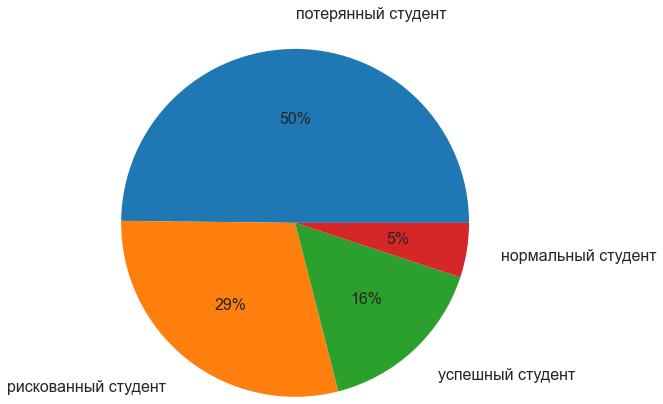

In [101]:
# посмотрим распределние статусов студентов
fields_5 = df_student_module_time_status['work_coeff'].value_counts()
plot = fields_5.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

In [102]:
# Определим самые проблемные курсы:
df_student_module_time[['course_title','work_coeff']]\
                        .groupby(['course_title'])\
                        .agg('mean')\
                        .sort_values(by='work_coeff', ascending = False)\
                        .round(1)

work_coeff
course_title                                   
Веб-разработчик                             3.2
Веб-вёрстка для начинающих 2.0              2.9
PHP-разработчик с 0 до PRO. Часть 1         2.6
Анимация интерфейсов                        2.5
Java-разработчик                            2.4
Excel Базовый                               2.4
Руководитель digital-проектов               2.3
JavaScript с нуля                           2.3
Веб-дизайн Базовый                          2.1
Интернет-маркетолог от Ingate               2.0
UX-дизайн                                   2.0
Веб-дизайн PRO 2.0                          1.9
Java-разработчик c нуля                     1.9
SMM-маркетолог от А до Я                    1.8
Веб-дизайн с нуля 2.0                       1.6

In [103]:
# Определим самые проблемные модули:
df_student_module_time[['course_title','module_title','work_coeff']]\
                        .groupby(['course_title','module_title'])\
                        .agg('mean')\
                        .reset_index()\
                        .sort_values(by='work_coeff', ascending = False)\
                        .round(1)\
                        .head(10)

course_title                          module_title  \
91                       UX-дизайн                  Экзаменационная тема   
8                    Excel Базовый               Экзаменационная работа    
211  Интернет-маркетолог от Ingate           Юридическая сторона рекламы   
190                Веб-разработчик                           О программе   
183                Веб-разработчик         PHP. Пользовательские функции   
175                Веб-разработчик  HTML. Общая структура HTML-документа   
182                Веб-разработчик          PHP. Место в структуре сайта   
133             Веб-дизайн PRO 2.0     План развития дизайнера на 3 года   
177                Веб-разработчик         Javascript – события часть 1    
96            Анимация интерфейсов           Motion design в интерфейсах   

     work_coeff  
91          9.1  
8           4.7  
211         4.6  
190         4.3  
183         3.9  
175         3.7  
182         3.6  
133         3.6  
177         3.4  
96          3.4